# 美國情境喜劇《Friends》對白的文本分析

+ 組長：M124020033 毛天楷
+ 組員：M124020041 洪維彤
+ 組員：M124020038 余婷婷

## 一、資料集介紹

資料集取自Kaggle，內容是美國情境喜劇《Friends》的對白台詞，共有56329筆資料，6個欄位

資料集欄位包括：
1. 季數(Season)：共10季
2. 集數(Episode)：每季集數略有不同，大部分集數落在24集左右
3. 場景(Scene)：標記不同場景與情境
4. 角色(Character)：說出台詞的角色，六位主要角色包括Rachel, Monica, Phoebe, Joey, Chandler和Ross。
5. 台詞順序(Line Index)：每集內的台詞編號，用來標識每句台詞在該集中的順序
6. 台詞(Line)：包含角色的對白，即每句台詞的文字內容。


## 二、動機與目的

**分析動機**：美國情境喜劇《Friends》，台灣又稱《六人行》，於1994年9月22日首播，並於2004年5月6日結束，共10季。
劇情圍繞著六位朋友在紐約市的生活、愛情和工作展開，情節既貼近現實又充滿幽默感。這種結合使得觀眾既能從中找到共鳴，又能享受輕鬆歡樂的觀賞體驗，因此廣受全球歡迎。

我們選擇《Friends》是因為此喜劇是被大眾所認為最經典的喜劇之一，並且多樣化的幽默方式吸引了不同年齡層和文化背景的觀眾。
即使是非常久遠的影集，但因為重播、串流平台吸引到了新的觀眾，因此影響力持續到了現在，不少人(包括組員)也都收看並重複觀看好幾遍。

**分析目的**：我們透過社群媒體分析課程所學到的NLP方法，來處理與分析對白文本，並根據分析結果，對劇情結構、角色塑造和文本風格提出洞察。

主要可分為三大方面：

1. **情緒分析**：觀察對白中常出現的正面、負面詞彙，視覺化來分析劇情中的情感與走向。
2. **主題模型**：根據不同集數做主題模型分析，來觀察每集是否有明確的主題類別。
3. **角色關聯**：透過角色之間的關聯，可以探討角色之間的互動模式，這對於理解劇情發展具有重要意義。


## 三、情緒分析、實體識別

【先將資料集進行斷詞、停用字處理，使用了兩個方法lexicon-base以及coreNLP來分析資料集】

### 1. 套件

In [ ]:
# 安裝會使用到的套件
%pip install stanza ipywidgets wordcloud textblob
# 會有不相容問題
%pip install --upgrade stanza
%pip install --upgrade protobuf
%pwd

In [ ]:
import stanza
from stanza.server import CoreNLPClient

import os
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

from nltk.parse import CoreNLPParser
from nltk.parse.corenlp import *
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [ ]:
# 下載斷句需要的資源
nltk.download('punkt')
# 下載POS tagger需要的資源
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# 下載coreNLP模型，預設會在/stanza_corenlp裡面
stanza.install_corenlp("./stanza_corenlp")

In [ ]:
os.environ['CORENLP_HOME'] = "./stanza_corenlp" # 因為自訂下載路徑，所以要設定環境參數

In [ ]:
# 設定 CoreNLPClient with some basic annotators, a memory allocation of 4GB, and port number 9999
client = CoreNLPClient(
            # client要處理的項目
            annotators=['tokenize','ssplit','pos','lemma','ner','entitymentions', 'parse', 'sentiment'],
            memory='4G',
            endpoint='http://localhost:9999',
            # If set to False, the server process will print detailed error logs
            be_quiet=True
        )

# Start the background server and wait for some time
# Note that in practice this is totally optional, as by default the server will be started when the first annotation is performed
client.start()
import time; time.sleep(5)

INFO:stanza:Writing properties to tmp file: corenlp_server-8e73517211e54b84.props
INFO:stanza:Starting server with command: java -Xmx4G -cp ./stanza_corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9999 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-8e73517211e54b84.props -annotators tokenize,ssplit,pos,lemma,ner,entitymentions,parse,sentiment -preload -outputFormat serialized


### 2. 資料處理

In [ ]:
df = pd.read_csv("dialogue_data.csv")
df['Line'] = df['Line'].astype(str)

df

Season  Episode  Line Index  \
0           1       16           0   
1           1       16           1   
2           1       16           2   
3           1       16           3   
4           1       16           4   
...       ...      ...         ...   
56324      10       17         561   
56325      10       17         562   
56326      10       17         563   
56327      10       17         564   
56328      10       17         565   

                                                   Scene Character  \
0                                      Rift’s Restaurant  Chandler   
1                                      Rift’s Restaurant      Joey   
2                                      Rift’s Restaurant  Chandler   
3                                      Rift’s Restaurant    Ursula   
4                                      Rift’s Restaurant  Chandler   
...                                                  ...       ...   
56324  Monica and Chandler's apartment. Chandler and ...  Chandler   
56325  Monica and Chandler's apartment. Chandler and ...    Rachel   
56326  Monica and Chandler's apartment. Chandler and ...    Monica   
56327  Monica and Chandler's apartment. Chandler and ...    Rachel   
56328  Monica and Chandler's apartment. Chandler and ...  Chandler   

                                                    Line  
0      This is unbelievable. It’s been like a half an...  
1      There’s the waitress. Excuse me, Miss. Hello, ...  
2                                       It’s Phoebe! Hi!  
3                            Hi. Okay, will that be all?  
4                Wait, wait! Wh-what are you doing here?  
...                                                  ...  
56324                            Oh, it's gonna be okay.  
56325  (crying) Do you guys have to go to the new hou...  
56326                                  We got some time.  
56327                   Okay, should we get some coffee?  
56328                                       Sure. Where?  

[56329 rows x 6 columns]

#### 2.1 斷詞

In [ ]:
# 刪除標點符號/數字/換行符號
df["Line"] = df["Line"].apply(lambda x: re.sub(r'[^\w\s]','', x))
#使用NLTK的斷詞函式word_tokenize進行斷詞
token_df = df.assign(token = df['Line'].apply(nltk.word_tokenize)).explode('token')
#將token統一為全小寫
lowerWord_df = token_df.assign(token= token_df['token'].str.lower())
lowerWord_df

Season  Episode  Line Index  \
0           1       16           0   
0           1       16           0   
0           1       16           0   
0           1       16           0   
0           1       16           0   
...       ...      ...         ...   
56327      10       17         564   
56327      10       17         564   
56327      10       17         564   
56328      10       17         565   
56328      10       17         565   

                                                   Scene Character  \
0                                      Rift’s Restaurant  Chandler   
0                                      Rift’s Restaurant  Chandler   
0                                      Rift’s Restaurant  Chandler   
0                                      Rift’s Restaurant  Chandler   
0                                      Rift’s Restaurant  Chandler   
...                                                  ...       ...   
56327  Monica and Chandler's apartment. Chandler and ...    Rachel   
56327  Monica and Chandler's apartment. Chandler and ...    Rachel   
56327  Monica and Chandler's apartment. Chandler and ...    Rachel   
56328  Monica and Chandler's apartment. Chandler and ...  Chandler   
56328  Monica and Chandler's apartment. Chandler and ...  Chandler   

                                                    Line         token  
0      This is unbelievable Its been like a half an h...          this  
0      This is unbelievable Its been like a half an h...            is  
0      This is unbelievable Its been like a half an h...  unbelievable  
0      This is unbelievable Its been like a half an h...           its  
0      This is unbelievable Its been like a half an h...          been  
...                                                  ...           ...  
56327                     Okay should we get some coffee           get  
56327                     Okay should we get some coffee          some  
56327                     Okay should we get some coffee        coffee  
56328                                         Sure Where          sure  
56328                                         Sure Where         where  

[647879 rows x 7 columns]

#### 2.2 Stemming

In [ ]:
# stemming 使用字根方式表達，把字尾去掉
porter = PorterStemmer()
type(porter)

# 小提醒：nltk許多function變數規定為字串，因此可以先將word轉為字串格式，以確保後續不會有錯誤
lowerWord_df['token'] = lowerWord_df['token'].astype(str)
stem_df = lowerWord_df.assign(stem_word= lowerWord_df['token'].apply(porter.stem)).reset_index(drop=True)
stem_df

Season  Episode  Line Index  \
0            1       16           0   
1            1       16           0   
2            1       16           0   
3            1       16           0   
4            1       16           0   
...        ...      ...         ...   
647874      10       17         564   
647875      10       17         564   
647876      10       17         564   
647877      10       17         565   
647878      10       17         565   

                                                    Scene Character  \
0                                       Rift’s Restaurant  Chandler   
1                                       Rift’s Restaurant  Chandler   
2                                       Rift’s Restaurant  Chandler   
3                                       Rift’s Restaurant  Chandler   
4                                       Rift’s Restaurant  Chandler   
...                                                   ...       ...   
647874  Monica and Chandler's apartment. Chandler and ...    Rachel   
647875  Monica and Chandler's apartment. Chandler and ...    Rachel   
647876  Monica and Chandler's apartment. Chandler and ...    Rachel   
647877  Monica and Chandler's apartment. Chandler and ...  Chandler   
647878  Monica and Chandler's apartment. Chandler and ...  Chandler   

                                                     Line         token  \
0       This is unbelievable Its been like a half an h...          this   
1       This is unbelievable Its been like a half an h...            is   
2       This is unbelievable Its been like a half an h...  unbelievable   
3       This is unbelievable Its been like a half an h...           its   
4       This is unbelievable Its been like a half an h...          been   
...                                                   ...           ...   
647874                     Okay should we get some coffee           get   
647875                     Okay should we get some coffee          some   
647876                     Okay should we get some coffee        coffee   
647877                                         Sure Where          sure   
647878                                         Sure Where         where   

       stem_word  
0            thi  
1             is  
2       unbeliev  
3             it  
4           been  
...          ...  
647874       get  
647875      some  
647876     coffe  
647877      sure  
647878     where  

[647879 rows x 8 columns]

#### 2.3 停用字

In [ ]:
# 初次使用需要安裝nltk中的停用字資源
nltk.download('stopwords')
# 使用nltk的stop_words
stops = stopwords.words('english')
# 手動加入停用字(觀察文字雲後持續調整)
newStops = ['could', 'would', 'much', 'must','im','ok','oh']
stops.extend(newStops)
#移除停用字
noStop_df = stem_df[~stem_df['token'].isin(stops)]
noStop_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Season  Episode  Line Index  \
2            1       16           0   
5            1       16           0   
7            1       16           0   
9            1       16           0   
14           1       16           0   
...        ...      ...         ...   
647870      10       17         563   
647871      10       17         564   
647874      10       17         564   
647876      10       17         564   
647877      10       17         565   

                                                    Scene Character  \
2                                       Rift’s Restaurant  Chandler   
5                                       Rift’s Restaurant  Chandler   
7                                       Rift’s Restaurant  Chandler   
9                                       Rift’s Restaurant  Chandler   
14                                      Rift’s Restaurant  Chandler   
...                                                   ...       ...   
647870  Monica and Chandler's apartment. Chandler and ...    Monica   
647871  Monica and Chandler's apartment. Chandler and ...    Rachel   
647874  Monica and Chandler's apartment. Chandler and ...    Rachel   
647876  Monica and Chandler's apartment. Chandler and ...    Rachel   
647877  Monica and Chandler's apartment. Chandler and ...  Chandler   

                                                     Line         token  \
2       This is unbelievable Its been like a half an h...  unbelievable   
5       This is unbelievable Its been like a half an h...          like   
7       This is unbelievable Its been like a half an h...          half   
9       This is unbelievable Its been like a half an h...          hour   
14      This is unbelievable Its been like a half an h...       cartoon   
...                                                   ...           ...   
647870                                   We got some time          time   
647871                     Okay should we get some coffee          okay   
647874                     Okay should we get some coffee           get   
647876                     Okay should we get some coffee        coffee   
647877                                         Sure Where          sure   

       stem_word  
2       unbeliev  
5           like  
7           half  
9           hour  
14       cartoon  
...          ...  
647870      time  
647871      okay  
647874       get  
647876     coffe  
647877      sure  

[329057 rows x 8 columns]

### 3. 詞頻、文字雲

In [ ]:
#出現詞彙的頻率前15名
freq_df = pd.DataFrame(noStop_df['stem_word'].value_counts()).reset_index()
freq_df.columns = ['word', 'freq']
freq_df.head(15)

word  freq
0    okay  4717
1    yeah  4478
2    know  4395
3    well  4096
4    dont  3903
5      go  3718
6     get  3567
7     hey  3552
8    look  3308
9      na  3303
10  right  3244
11   like  3120
12    gon  2624
13  think  2574
14   your  2557

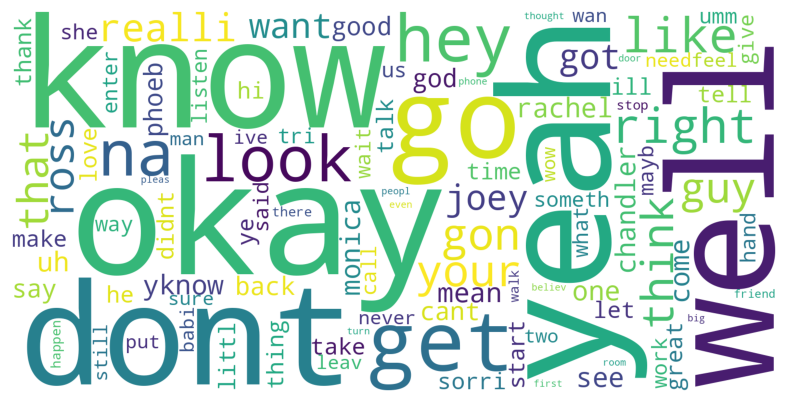

In [ ]:
text = freq_df.set_index('word').to_dict()
wordcloud = WordCloud(scale = 4, background_color = 'white', max_words=100).generate_from_frequencies(text['freq'])
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

####【分析結果：從文字雲看到最常出現的詞彙，多為日常生活用語】

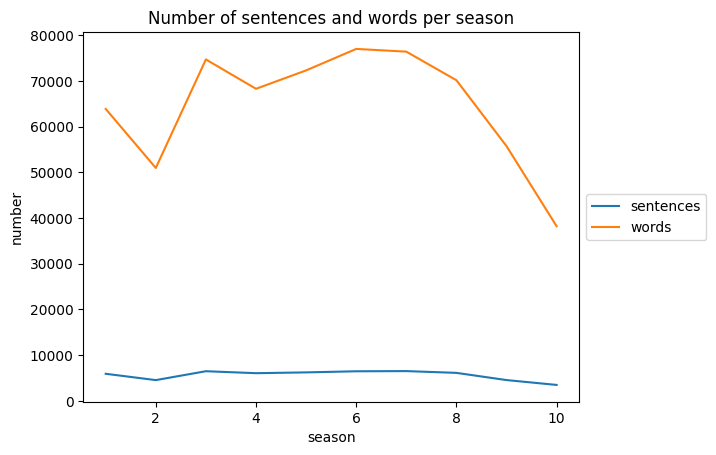

In [ ]:
season_count = pd.DataFrame({
    'season': df.groupby('Season').size().index,
    'sentence': df.groupby('Season').size().values,
    'word': token_df.groupby('Season').size().values,
})
season_count

plt.plot(season_count['season'].values, season_count['sentence'].values ,label = 'sentences')
plt.plot(season_count['season'].values, season_count['word'].values, label = 'words')

plt.title('Number of sentences and words per season') # 標題
plt.xlabel('season') # x軸標題
plt.ylabel('number') # y軸標題
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10) # 顯示label在右邊
plt.show()

### 4. lexicon-base

In [ ]:
# 讀取情緒字典
en_dict_path = "./liwc/LIWC_EN.csv"
liwc_dict = pd.read_csv(en_dict_path)
liwc_dict = liwc_dict.rename(columns={'name': 'token', "class": 'sentiments'})
liwc_dict['sentiments'].unique()

array(['affect', 'positive', 'negative', 'anx', 'anger', 'sad'],
      dtype=object)

In [ ]:
df = noStop_df.copy()
liwc_df = pd.merge(df, liwc_dict, how = 'left')
print(liwc_df['sentiments'].value_counts())
liwc_df

sentiments
affect      37575
positive    27996
negative     9368
sad          2925
anger        2204
anx          1030
Name: count, dtype: int64


Season  Episode  Line Index  \
0            1       16           0   
1            1       16           0   
2            1       16           0   
3            1       16           0   
4            1       16           0   
...        ...      ...         ...   
372575      10       17         564   
372576      10       17         564   
372577      10       17         564   
372578      10       17         565   
372579      10       17         565   

                                                    Scene Character  \
0                                       Rift’s Restaurant  Chandler   
1                                       Rift’s Restaurant  Chandler   
2                                       Rift’s Restaurant  Chandler   
3                                       Rift’s Restaurant  Chandler   
4                                       Rift’s Restaurant  Chandler   
...                                                   ...       ...   
372575  Monica and Chandler's apartment. Chandler and ...    Rachel   
372576  Monica and Chandler's apartment. Chandler and ...    Rachel   
372577  Monica and Chandler's apartment. Chandler and ...    Rachel   
372578  Monica and Chandler's apartment. Chandler and ...  Chandler   
372579  Monica and Chandler's apartment. Chandler and ...  Chandler   

                                                     Line         token  \
0       This is unbelievable Its been like a half an h...  unbelievable   
1       This is unbelievable Its been like a half an h...          like   
2       This is unbelievable Its been like a half an h...          half   
3       This is unbelievable Its been like a half an h...          hour   
4       This is unbelievable Its been like a half an h...       cartoon   
...                                                   ...           ...   
372575                     Okay should we get some coffee          okay   
372576                     Okay should we get some coffee           get   
372577                     Okay should we get some coffee        coffee   
372578                                         Sure Where          sure   
372579                                         Sure Where          sure   

       stem_word sentiments  
0       unbeliev        NaN  
1           like        NaN  
2           half        NaN  
3           hour        NaN  
4        cartoon        NaN  
...          ...        ...  
372575      okay   positive  
372576       get        NaN  
372577     coffe        NaN  
372578      sure     affect  
372579      sure   positive  

[372580 rows x 9 columns]

####【分析結果：長條圖顯示了每個季所出現過的正負面詞彙，因為喜劇的緣由，正面詞彙會稍多一點】

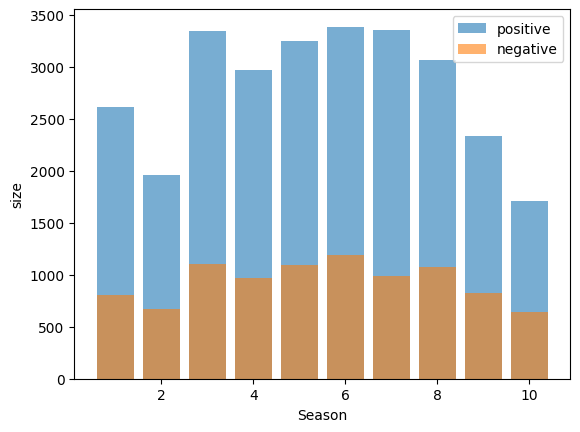

In [ ]:
# 算出每季情緒總和(sentiment_count)

sentiment_count = pd.DataFrame(liwc_df.groupby(['Season', 'sentiments']).size()).reset_index()

mask = (sentiment_count['sentiments'] == "positive") | (sentiment_count['sentiments'] == "negative")
sentiment_count = sentiment_count.loc[mask]

sentiment_count = sentiment_count.rename(columns={0: 'size'})
sentiment_count
#取出每季的正面、負面詞彙數量
pos = sentiment_count[sentiment_count['sentiments']=='positive']
neg = sentiment_count[sentiment_count['sentiments']=='negative']
#畫出長條圖
colors = ["tab:blue",  "tab:orange"]
fig, ax = plt.subplots()

ax.bar(pos['Season'],
       pos['size'],
       color = colors[0],
       alpha = 0.6,
       align='center')
ax.bar(neg['Season'],
       neg['size'],
       color = colors[1],
       alpha = 0.6,
       align='center')
plt.xlabel('Season')
plt.ylabel('size')

ax.legend(['positive','negative'], loc ='upper right')
plt.show()

排名悲傷情緒的集數

In [ ]:
sad = liwc_df[liwc_df['sentiments'].isin(['sad'])]
sad

sad_counts = sad.groupby(['Season', 'Episode']).size().reset_index(name='sad_count') # sad的次數
total_lines = liwc_df.groupby(['Season', 'Episode']).size().reset_index(name='total_count') # total的次數
total_lines
merged_df = pd.merge(sad_counts, total_lines, on=['Season', 'Episode'])
merged_df['sad_frequency'] = merged_df['sad_count'] / merged_df['total_count']
ranked_df = merged_df.sort_values(by='sad_frequency', ascending=False).reset_index(drop=True)
ranked_df

Season  Episode  sad_count  total_count  sad_frequency
0         9        8          2           88       0.022727
1         2       15         22         1244       0.017685
2         6       14         28         1778       0.015748
3         3       12         25         1675       0.014925
4         6        6         27         1887       0.014308
..      ...      ...        ...          ...            ...
212       1       17          4         1696       0.002358
213       9        4          2          861       0.002323
214       4       19          3         1309       0.002292
215       8        6          4         1880       0.002128
216       4       17          2         1602       0.001248

[217 rows x 5 columns]

####【分析結果：透過情緒比例的季數集數排名，我們可以發現某集的悲傷程度可能會高一點，在喜劇中悲傷比例較高，可能表示劇情與挫折、離別、人際關係問題有關】

### 5. coreNLP

In [ ]:
def get_nlp_result(df, text_col, id_col):

    print("Starting a server with the Python \"with\" statement...")

    start = time.time()

    with CoreNLPClient(
        annotators = ['tokenize','ssplit', 'pos', 'lemma', 'ner','sentiment','entitymentions'],
        memory = '4G', endpoint = 'http://localhost:7777' , be_quiet=True,
    ) as client:

        token_list = []
        senti_list = []
        mention_list = []

        for index, row in df.iterrows(): # document level
            # send text into client
            document = client.annotate(row[text_col])
            # print(f"{'Word':12s}\t{'Lemma':12s}\t{'POS':6s}\t{'NER'}")

             # sentence level
            for i, sent in enumerate(document.sentence):
                s = ""
                # token level
                for t in sent.token:
                    s = s + " " + t.word # for sentence
                    # print("{:12s}\t{:12s}\t{:6s}\t{}".format(t.word, t.lemma, t.pos, t.ner))
                    # save lemma, pos, ner
                    temp_token = [row[id_col],t.word, t.lemma, t.pos, t.ner]
                    token_list.append(temp_token)
                # print("[Sentence {}:{}_____________]".format(i+1, s))

                # save sentiment, mention
                temp_senti = [row[id_col], s, sent.sentiment]
                senti_list.append(temp_senti)

                for mention in sent.mentions:
                    try:
                        # print(mention.entityMentionText, mention.ner)
                        temp_mention = [row[id_col], mention.entityMentionText, mention.ner]
                        mention_list.append(temp_mention)
                    except:
                        continue

        token_table = pd.DataFrame(data=token_list,
                            columns=[id_col,'word','lemma','pos','ner'])

        senti_table = pd.DataFrame(data=senti_list,
                            columns=[id_col,'sentence', 'sentiment'])

        mention_table = pd.DataFrame(data=mention_list,
                            columns=[id_col, 'mention','ner'])

        end = time.time()

        print("time costing: {}".format(end - start))
        print("\nThe server should be stopped upon exit from the \"with\" statement.")

        return token_table, senti_table , mention_table

取第一季第一集(試播集)來做分析，來觀察此集的情緒以及提及之實體

In [ ]:
df_season1 = df[(df['Season'] == 1)&(df['Episode']==1)]
df_season1 = df_season1[['Line Index','Line']]
df_season1

Line Index                                               Line
1017           0  Theres nothing to tell Hes just some guy I wor...
1018           1  Cmon youre going out with the guy Theres gotta...
1019           2  All right Joey be nice  So does he have a hump...
1020           3                             Wait does he eat chalk
1021           4  Just cause I dont want her to go through what ...
...          ...                                                ...
1312         295                 Yeah Yeah Ill have a cup of coffee
1313         296  Kids new dream Im in Las Vegas Rachel sits dow...
1314         297                   To Rachel Ahh miss   More coffee
1315         298  Ugh To another customer thats leaving Excuse m...
1316         299            Okay so Im in Las Vegas Im Liza Minelli

[300 rows x 2 columns]

In [ ]:
# 找出NER、POS和sentiment分析結果
tokens, sentiment, mention  = get_nlp_result(df_season1,'Line','Line Index') # 資料框, 要處理的文字欄位名, id 欄位名
# total time costing: 148


INFO:stanza:Writing properties to tmp file: corenlp_server-f668f055f30e4339.props
INFO:stanza:Starting server with command: java -Xmx4G -cp ./stanza_corenlp/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 7777 -timeout 60000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-f668f055f30e4339.props -annotators tokenize,ssplit,pos,lemma,ner,sentiment,entitymentions -preload -outputFormat serialized


Starting a server with the Python "with" statement...
time costing: 148.5612030029297

The server should be stopped upon exit from the "with" statement.


In [ ]:
# 字詞標註dataframe # 文章id, 字詞, 詞性還原, 詞性, 實體
tokens.head()


Line Index     word    lemma  pos           ner
0           0   Theres   theres   IN             O
1           0  nothing  nothing   NN             O
2           0       to       to   TO             O
3           0     tell     tell   VB             O
4           0      Hes       he  NNS  ORGANIZATION

In [ ]:
# 情緒分析dataframe # 文章id, 句子, 情緒
sentiment.head()


Line Index                                           sentence sentiment
0           0   Theres nothing to tell Hes just some guy I wo...  Negative
1           1   Cmon youre going out with the guy Theres got ...  Negative
2           2   All right Joey be nice So does he have a hump...  Positive
3           3                             Wait does he eat chalk   Neutral
4           4   Just cause I do nt want her to go through wha...   Neutral

In [ ]:
# 實體標註 dataframe # 文章id, 字詞, 實體
mention.head()

Line Index mention           ner
0           0     Hes  ORGANIZATION
1           1     him        PERSON
2           2    Joey        PERSON
3           2      he        PERSON
4           3      he        PERSON

In [ ]:
# 儲存結果
tokens.to_csv('raw_data/tokens_tp.csv', encoding = 'utf-8', index = False)
sentiment.to_csv('raw_data/sentiment_tp.csv', encoding = 'utf-8', index = False)
mention.to_csv('raw_data/mention_tp.csv', encoding = 'utf-8', index = False)

# 讀取已經執行完畢的結果
tokens = pd.read_csv('raw_data/tokens_tp.csv')
mention = pd.read_csv('raw_data/mention_tp.csv')
sentiment = pd.read_csv('raw_data/sentiment_tp.csv')

In [ ]:
mention['word_lower'] = mention['mention'].str.lower()
mention.tail()

Line Index       mention     ner    word_lower
266         298     Las Vegas    CITY     las vegas
267         298           him  PERSON           him
268         298            He  PERSON            he
269         299     Las Vegas    CITY     las vegas
270         299  Liza Minelli  PERSON  liza minelli

#### 5.1 NER-PERSON

####【分析結果：可以看到Paul被提到最多次，但它並不是六個主角之一，而是Monica剛認識的約會對象，為此集重要劇情發展配角之一。第二名~第六名為本劇主角，Phoebe未被提到可能是因為在本集並不是劇情發展人物】

for ner: ['O']
for entityMention: ['PERSON']
for ner: ['O']
for entityMention: ['PERSON']


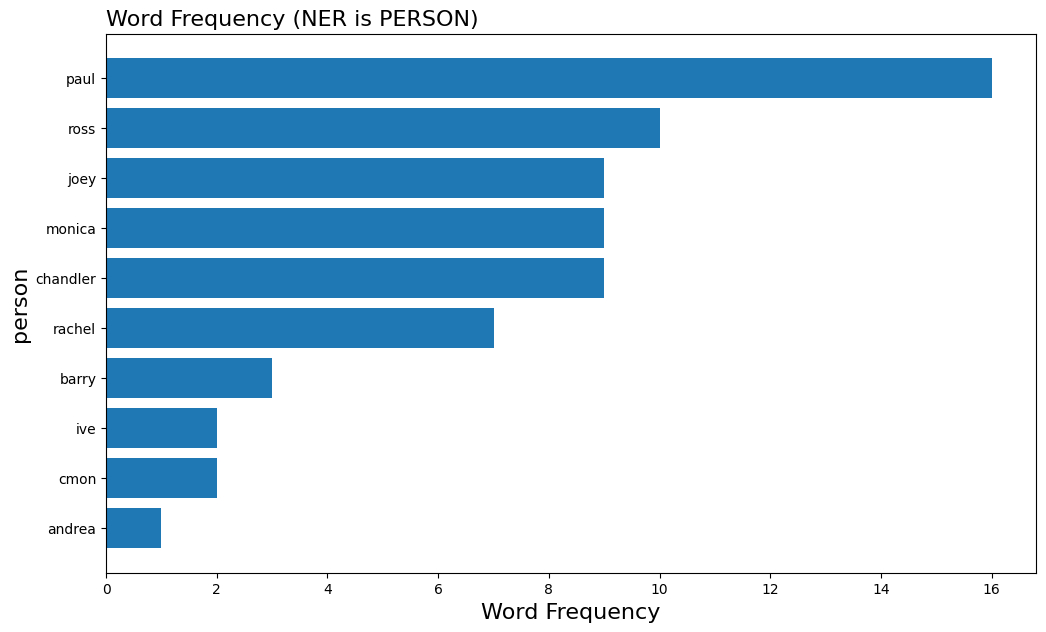

In [ ]:
# 查看 her 的 NER 分類
keyword_list = ['her']
print("for ner:", tokens.loc[tokens['word'] == 'her'].ner.unique())
print("for entityMention:", mention.loc[mention['word_lower'] == 'her'].ner.unique())

keyword_list = ['his']
print("for ner:", tokens.loc[tokens['word'] == 'his'].ner.unique())
print("for entityMention:", mention.loc[mention['word_lower'] == 'his'].ner.unique())

peo = mention.loc[mention['ner'] == 'PERSON']

# 手動移除coreNLP分不好的字詞
remove_l = ['her','his','he','she','him']
peo = peo[~peo.word_lower.isin(remove_l)]

peo_count = peo[['word_lower']].groupby(['word_lower'])['word_lower'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
peo_count.head()

word = peo_count['word_lower']
count = peo_count['count']

fig, ax = plt.subplots(figsize =(12, 7))
ax.barh(word, count)
ax.invert_yaxis()
ax.set_title('Word Frequency (NER is PERSON)',loc ='left', size = 16)
ax.set_ylabel('person', size = 16)
ax.set_xlabel('Word Frequency', size = 16)
fig.show()

####【分析結果：從關鍵字"Paul"找尋出現台詞的情緒並沒有正面的情緒，其中包含5句為負面，回顧此劇情可以發現，因為Paul是個騙子，所以提到Paul的態度和情緒都不是很好。】

In [ ]:
contains_paul = sentiment[sentiment['sentence'].str.contains('paul', case=False, na=False)]
sentiment_counts = contains_paul['sentiment'].value_counts()
print(sentiment_counts)
contains_paul


sentiment
Neutral     14
Negative     5
Name: count, dtype: int64


Line Index                                           sentence sentiment
74           74                  over the intercom Its uh its Paul   Neutral
76           76                                          Whos Paul   Neutral
77           77                             Paul the Wine Guy Paul   Neutral
78           78   Maybe Joey Wait Your not a real date tonight ...  Negative
87           87        normal voice No go on Its Paul the Wine Guy   Neutral
89           89   Hi come in Paul this is They are all lined up...   Neutral
90           90                       Hey Paul Hi The Wine Guy Hey   Neutral
91           91      Im sorry I did nt catch your name Paul was it  Negative
94           94     Change Okay sit down Shows Paul in Two seconds  Negative
96           96                                           Hey Paul   Neutral
144         144   Stay out of my freezer Scene A Restaurant Mon...  Negative
175         175                                       Morning Paul   Neutral
176         176                                         Hello Paul   Neutral
177         177                                      Hi Paul is it   Neutral
215         215                                      You know Paul   Neutral
216         216              Paul the Wine Guy Oh yeah I know Paul   Neutral
217         217            You mean you know Paul like I know Paul   Neutral
218         218   Are you kidding I take credit for Paul Yknow ...  Negative
263         263   Thats Pauls watch You just put it back where ...   Neutral

#### 5.2 Sentiment Analysis

In [ ]:
# 看有哪些情緒
sentiment['sentiment'].unique()
# 看一下各情緒的分布
sentiment.groupby('sentiment')['sentiment'].agg(['count'])
# 將情緒轉為分數
def label_sentiment(row):
    if row['sentiment'] == "Very positive" :
        return 2
    if row['sentiment'] == "Positive" :
        return 1
    if row['sentiment'] == "Neutral" :
        return 0
    if row['sentiment'] == "Negative" :
        return -1
    if row['sentiment'] == "Very negative" :
        return -2

sentiment['sentimentValue'] = sentiment.apply(lambda row: label_sentiment(row), axis=1)
sentiment.head()

print(sentiment.groupby('sentiment')['sentiment'].agg(['count']))

               count
sentiment           
Negative          65
Neutral          190
Positive          43
Very positive      2


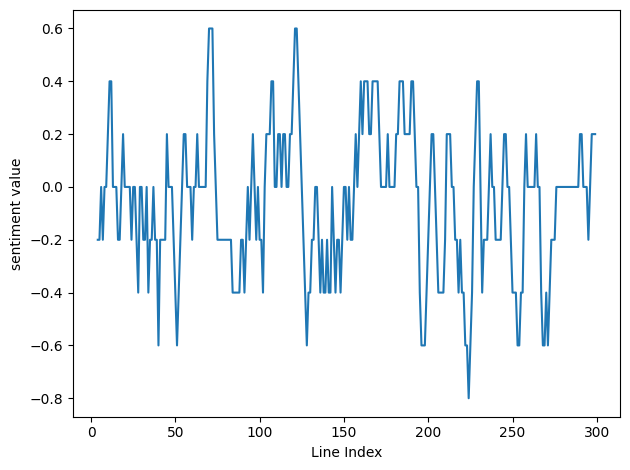

In [ ]:
#每5句取平均
sentiment['smoothed_sentiment'] = sentiment['sentimentValue'].rolling(window=5).mean()

# 情緒分數時間趨勢
plt.plot(sentiment['Line Index'].values, sentiment['smoothed_sentiment'].values , linestyle='solid')
plt.xlabel('Line Index') # x軸標題
plt.ylabel('sentiment value') # y軸標題
plt.tight_layout()
plt.show()

####【分析結果：
+ Line Index(x軸)可看做此集的時間軸，雖然有很多波動，但似乎沒有明顯的上升或下降趨勢，情緒在正面和負面之間來回變化。
+ Neutral (中性) 的句數最多(190句)，大多數台詞情緒平淡，主要為大量日常對話，跟情景喜劇的風格相符。
+ Negative (負面) 的句數比正面多一點，這可能反映了角色遇到的困難或衝突，例如 Rachel 在婚禮上逃跑、Ross 面對離婚等情節。】

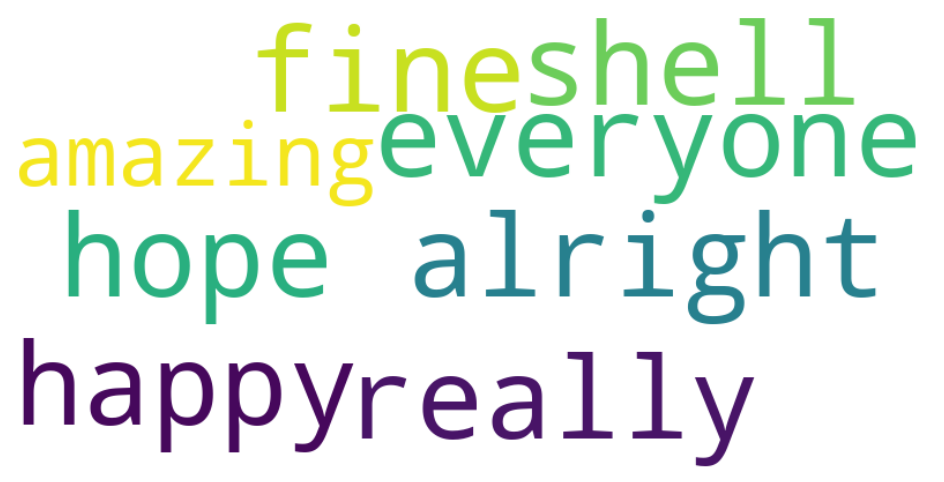

In [ ]:
# 把 token 的字詞降大小寫
tokens['lemma_lower'] = tokens['lemma'].str.lower()

# 挑出正面詞彙
positive = sentiment[sentiment['sentiment'].isin(['Very positive'])]
positive_words = pd.merge(positive,tokens,on='Line Index',how='left')

# 匯入預設的stop words，也可以自訂
stop_words = set(stopwords.words('english'))
stop_words.update(["could", "would", "might", "may", "im", "must","okay","cant","ill"])

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words,
                max_font_size=100, width=800, height = 400, background_color="white")\
                .generate(' '.join(positive_words['lemma_lower']))

# Display the generated image:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

#### 非常正面詞彙文字雲：
只有2句的情緒屬於"非常正面"，想觀察是哪些詞彙

【分析結果："fine","hope","amazing"等等的正面詞彙】


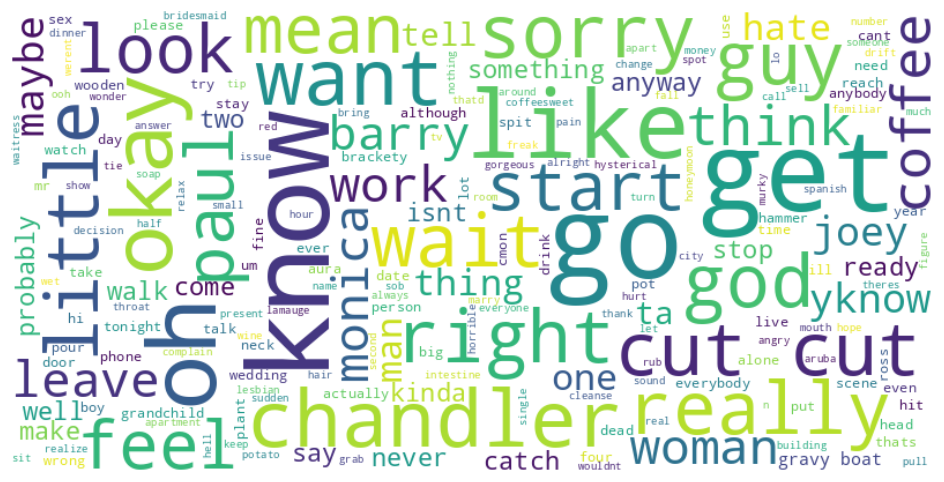

In [ ]:
negative = sentiment[sentiment['sentiment'].isin(['Negative'])]
negative_words = pd.merge(negative,tokens,on='Line Index',how='left')
# 匯入預設的stop words 也可以自訂
stop_words = set(stopwords.words('english'))
stop_words.update(["could", "would", "might", "may", "youre","im"])

# 可以設定字型大小和背景顏色
wordcloud = WordCloud(
                stopwords=stop_words,
                max_font_size=100, width=800, height = 400, background_color="white")\
                .generate(' '.join(negative_words['lemma_lower']))

# Display the generated image:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud, interpolation="bilinear")

plt.axis("off")
plt.show()

#### 負面詞彙文字雲

【分析結果："sorry","wait"等等的負面詞彙，主角Chandler也出現在負面句子裡面】

## 四、主題模型

1.   資料前處理
2.   tf-idf + 2/3-gram
3.   LDA主題模型 + Bertopic模型



In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models


import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re
import os
from collections import Counter
from nltk.util import ngrams

ModuleNotFoundError: No module named 'pyLDAvis'

### 資料前處理
### 將原始txt統整成單一資料表，並新增場景、角色與對白

In [ ]:

def parse_text(file_path):
    # 使用re.IGNORECASE來使匹配不區分大小寫
    season_episode = re.match(r"s(\d+)e(\d+)", os.path.basename(file_path), re.IGNORECASE)
    if not season_episode:
        print(f"Cannot parse season and episode from filename: {file_path}")
        return []  # 返回空列表表示此文件無法解析

    season, episode = season_episode.groups()
    data = []

    with open(file_path, 'r', encoding='utf-8') as file:
        scene = None
        line_index = 0
        for line in file:
            # 改進場景匹配，只捕獲冒號之前的地點名
            scene_match = re.match(r"\[Scene: ([^,]+),", line)
            if scene_match:
                scene = scene_match.group(1).strip()

            # 確保不處理場景描述行作為對話
            elif ':' in line and scene and not line.startswith('['):
                character, dialogue = line.split(':', 1)
                data.append([season, episode, line_index, scene, character.strip(), dialogue.strip()])
                line_index += 1

    return data

def process_files(directory):
    all_data = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory, filename)
            file_data = parse_text(file_path)
            all_data.extend(file_data)

    if all_data:
        df = pd.DataFrame(all_data, columns=['Season', 'Episode', 'Line Index', 'Scene', 'Character', 'Line'])
        #儲存檔案
        df.to_csv('output.csv', index=False)
    else:
        print("No data parsed. Please check the file names and contents.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# TXT檔案存放在 'texts' 目錄下
process_files('texts')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

# 讀取數據
df = pd.read_csv('./output.csv')  # 或者你的CSV文件路徑
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Season  Episode  Line Index              Scene Character  \
0       1       16           0  Rift’s Restaurant  Chandler   
1       1       16           1  Rift’s Restaurant      Joey   
2       1       16           2  Rift’s Restaurant  Chandler   
3       1       16           3  Rift’s Restaurant    Ursula   
4       1       16           4  Rift’s Restaurant  Chandler   

                                                Line  
0  This is unbelievable. It’s been like a half an...  
1  There’s the waitress. Excuse me, Miss. Hello, ...  
2                                   It’s Phoebe! Hi!  
3                        Hi. Okay, will that be all?  
4            Wait, wait! Wh-what are you doing here?

將每集的對白合併，新增每集唯一索引。

In [ ]:
# 創建一個新列 'Season_Episode' 來標識每一集
df['Season_Episode'] = df['Season'].astype(str) + 'E' + df['Episode'].astype(str)

# 確保所有的 Line 列都是字符串類型，將 NaN 轉換為 ""
df['Line'] = df['Line'].fillna('').astype(str)

# 再次創建一個新列 'Season_Episode' 來標識每一集
df['Season_Episode'] = df['Season'].astype(str) + 'E' + df['Episode'].astype(str)

# 接下來，對數據進行分組，並將每集的對白合併為一個長字符串
grouped_data = df.groupby('Season_Episode')['Line'].apply(' '.join).reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#合併季數跟集數成每一集的鍵值
print(len(grouped_data['Season_Episode']))
grouped_data.head()

219


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Season_Episode                                               Line
0           10E1  Oh, the way you crushed Mike at ping pong was ...
1          10E10  Rachel, this is yours. Aah! Why? What are thes...
2          10E11  (to Rachel) Thank you so much for this. Oh, d'...
3          10E12  Sven I don't understand what you're saying! Wh...
4          10E13  All right, it seems pretty simple. Your first ...

### 文本前處理，新增格式

用預設的NLTK停用字對篩選，並調整格式，方便後續製作字典跟詞袋模型。

In [ ]:
nltk.download('punkt')

# 資料前處理函數
# 改小寫、去除停用字
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    #tokens = [word for word in tokens if word.isalpha() and word not in custom_stopwords]
    return tokens

# 對每一行對白進行處理
grouped_data['processed'] = grouped_data['Line'].apply(preprocess)
# 將列表轉換為字串並存儲在新欄位中
grouped_data['concated'] = grouped_data['processed'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
grouped_data.to_csv('grouped_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 讀取數據
grouped_data= pd.read_csv('./grouped_data.csv')

In [ ]:
grouped_data.head(20)

Season_Episode                                               Line  \
0     1.000000e+02  Oh, the way you crushed Mike at ping pong was ...   
1     1.000000e+11  Rachel, this is yours. Aah! Why? What are thes...   
2     1.000000e+12  (to Rachel) Thank you so much for this. Oh, d'...   
3     1.000000e+13  Sven I don't understand what you're saying! Wh...   
4     1.000000e+14  All right, it seems pretty simple. Your first ...   
5     1.000000e+15  Hey Mon? Was it weird changing your name to Ge...   
6     1.000000e+16  Hey Phoebe. Hey. Everything ok? I’m just mad a...   
7     1.000000e+17  Oh, wow, can you believe you're like three wee...   
8     1.000000e+18  Breathe, breathe, breathe... Good. Next time, ...   
9     1.000000e+03  Oh, god. So adorable. Look at them sleeping th...   
10    1.000000e+06  Hi. I just had the worst anniversary ever. I d...   
11    1.000000e+07  (she enters) Hey... Hey! Hi! Pheebs, what's wr...   
12    1.000000e+08  Guys? Everything ok? It's me, Joe... (Screams ...   
13    1.000000e+09  Hey guys! Hi! Hey! We need to talk to you abou...   
14    1.000000e+10  We got some really great stuff! Yeah, yeah but...   
15    1.000000e+01  There's nothing to tell! He's just some guy I ...   
16    1.000000e+10  Guys? There's a somebody I'd like you to meet....   
17    1.000000e+11  Why did I 'woo-hoo'? I mean, what was I hoping...   
18    1.000000e+12  No-no-no-no, we're done. Aunt Syl, stop yellin...   
19    1.000000e+13  That is it! You just barge in here, you don't ...   

                                            processed  \
0   ['oh', 'way', 'crushed', 'mike', 'ping', 'pong...   
1   ['rachel', 'aah', 'see', 'right', 'everybody',...   
2   ['rachel', 'thank', 'much', 'oh', 'like', 'oh'...   
3   ['sven', 'understand', 'saying', 'wrong', 'flo...   
4   ['right', 'seems', 'pretty', 'simple', 'first'...   
5   ['hey', 'mon', 'weird', 'changing', 'name', 'f...   
6   ['hey', 'phoebe', 'hey', 'everything', 'ok', '...   
7   ['oh', 'wow', 'believe', 'like', 'three', 'wee...   
8   ['breathe', 'breathe', 'breathe', 'good', 'nex...   
9   ['oh', 'god', 'adorable', 'look', 'sleeping', ...   
10  ['hi', 'worst', 'anniversary', 'ever', 'doubt'...   
11  ['enters', 'hey', 'hey', 'hi', 'pheebs', 'wron...   
12  ['guys', 'everything', 'ok', 'joe', 'screams',...   
13  ['hey', 'guys', 'hi', 'hey', 'need', 'talk', '...   
14  ['got', 'really', 'great', 'stuff', 'yeah', 'y...   
15  ['nothing', 'tell', 'guy', 'work', 'going', 'g...   
16  ['guys', 'somebody', 'like', 'meet', 'oooh', '...   
17  ['mean', 'hoping', 'would', 'happen', 'turn', ...   
18  ['done', 'aunt', 'syl', 'stop', 'yelling', 'sa...   
19  ['barge', 'knock', 'sorry', 'respect', 'anybod...   

                                             concated  
0   oh way crushed mike ping pong wan na plays fin...  
1   rachel aah see right everybody open ooh oh wow...  
2   rachel thank much oh like oh god elegant dirty...  
3   sven understand saying wrong flowers lorkins h...  
4   right seems pretty simple first line name clau...  
5   hey mon weird changing name felt nice acknowle...  
6   hey phoebe hey everything ok mad agent estelle...  
7   oh wow believe like three weeks away know mind...  
8   breathe breathe breathe good next time say bre...  
9   oh god adorable look sleeping like angels yeah...  
10  hi worst anniversary ever doubt tell us last y...  
11  enters hey hey hi pheebs wrong oh exhausted dr...  
12  guys everything ok joe screams interrupt joey ...  
13  hey guys hi hey need talk something yeah feel ...  
14  got really great stuff yeah yeah sure bra got ...  
15  nothing tell guy work going guy got ta somethi...  
16  guys somebody like meet oooh would marcel wan ...  
17  mean hoping would happen turn round say love s...  
18  done aunt syl stop yelling saying told vegetar...  
19  barge knock sorry respect anybody privacy rach...

### tf-idf + 2/3-gram

2-gram/3-gram，發現有很多口語化的用字，像是oh  yeah、okay  okay等等

In [ ]:
# 生成bi-grams和tri-grams
bigrams = []
trigrams = []
for tokens in grouped_data['processed']:
    bigrams.extend(ngrams(tokens, 2))
    trigrams.extend(ngrams(tokens, 3))

# 計算n-grams的出現次數
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# 印出統計數量
print("Top 20 Bigrams:")
for bigram, count in bigram_counts.most_common(20):
    print(f"{bigram}: {count}")
print("\nTop 20 Bigrams:")
bigrams_list = [f"{bigram[0]} {bigram[1]}" for bigram, count in bigram_counts.most_common(20)]
print(bigrams_list)


print("\nTop 20 Trigrams:")
for trigram, count in trigram_counts.most_common(20):
    print(f"{trigram}: {count}")
print("\nTop 20 Trigrams:")
trigrams_list = [f"{trigram[0]} {trigram[1]} {trigram[2]}" for trigram, count in trigram_counts.most_common(20)]
print(trigrams_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 20 Bigrams:
('gon', 'na'): 2632
('oh', 'god'): 1137
('wan', 'na'): 678
('hey', 'hey'): 566
('oh', 'yeah'): 463
('got', 'ta'): 457
('okay', 'okay'): 395
('yeah', 'yeah'): 271
('na', 'go'): 260
('know', 'know'): 256
('oh', 'oh'): 239
('yeah', 'well'): 237
('entering', 'hey'): 217
('na', 'get'): 196
('yeah', 'know'): 189
('hey', 'guys'): 186
('oh', 'well'): 178
('wait', 'minute'): 172
('ca', 'believe'): 172
('oh', 'know'): 171

Top 20 Bigrams:
['gon na', 'oh god', 'wan na', 'hey hey', 'oh yeah', 'got ta', 'okay okay', 'yeah yeah', 'na go', 'know know', 'oh oh', 'yeah well', 'entering hey', 'na get', 'yeah know', 'hey guys', 'oh well', 'wait minute', 'ca believe', 'oh know']

Top 20 Trigrams:
('gon', 'na', 'go'): 215
('gon', 'na', 'get'): 147
('oh', 'god', 'oh'): 110
('got', 'ta', 'go'): 107
('know', 'gon', 'na'): 107
('hey', 'hey', 'hey'): 107
('think', 'gon', 'na'): 100
('entering', 'hey', 'hey'): 89
('well', 'gon', 'na'): 77
('okay', 'gon', 'na'): 70
('god', 'oh', 'god'): 68
('gon',

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 計算TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(grouped_data['concated'])

# 取得詞彙表
feature_names = vectorizer.get_feature_names_out()

# 將TF-IDF矩陣轉換為DataFrame以便查看
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# 顯示TF-IDF結果中的高值詞彙
top_n = 20  # 設定要查看的前N個詞
top_n_words = tfidf_df.sum().sort_values(ascending=False).head(top_n)
print("Top TF-IDF words:")
print(top_n_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top TF-IDF words:
oh          40.877724
know        31.644825
okay        31.199130
yeah        26.142197
well        22.498092
hey         20.727083
na          19.630192
right       18.849553
like        17.323289
get         15.828147
gon         15.774384
ross        14.402575
go          13.827411
really      13.725469
uh          13.020054
got         12.908772
joey        12.804332
think       12.537891
look        12.200650
chandler    11.369871
dtype: float64


In [ ]:
stopwords_candidate = list(top_n_words.index)
print(stopwords_candidate)

['oh', 'know', 'okay', 'yeah', 'well', 'hey', 'na', 'right', 'like', 'get', 'gon', 'ross', 'go', 'really', 'uh', 'got', 'joey', 'think', 'look', 'chandler']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 新增停用字

In [ ]:
# 新增停用字字典
new_stopwords = [
    'gon', 'oh god', 'wan', 'na', 'hey', 'oh yeah', 'got ta', 'okay', 'yeah', 'know', 'oh', 'hey guys',
    'oh well', 'wait minute', 'ca believe', 'oh know', 'well', 'like', 'really', 'think', 'look',
    'ok', 'ca', 'na', 'uh', 'hi', 'ya', 'yes', 'um', 'please', 'guys', 'get', 'got',
    'joey', 'go', 'see', 'right', 'ross', 'chandler', 'monica', 'mean', 'would', 'god', 'say', 'want',
    'rachel', 'one', 'going', 'come', 'good', 'let', 'phoebe', 'great', 'guy', 'sorry', 'little', 'back', 'looks', 'thing', 'time', 'alright', 'tell', 'said'
]


In [ ]:
# 自定義停用詞
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(new_stopwords)  # 新增你要的停用詞

In [ ]:
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    total_tokens = len(tokens)
    default_stopped = sum(1 for word in tokens if word in stop_words)
    custom_stopped = sum(1 for word in tokens if word in custom_stopwords)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words and word not in custom_stopwords]
    return tokens, default_stopped, custom_stopped, total_tokens

In [ ]:
# 對每一行對白進行處理
grouped_data['processed'], grouped_data['default_stopped'], grouped_data['custom_stopped'], grouped_data['total_tokens'] = zip(*grouped_data['Line'].apply(preprocess))

# 將列表轉換為字串並存儲在新欄位中
grouped_data['concated'] = grouped_data['processed'].apply(lambda x: ' '.join(x))

# 統計被刪除的詞總數
total_default_stopped = grouped_data['default_stopped'].sum()
total_custom_stopped = grouped_data['custom_stopped'].sum()

# 計算被刪除的詞佔原文的百分比
total_stopped = total_default_stopped + total_custom_stopped
total_original_tokens = grouped_data['total_tokens'].sum()
percentage_stopped = (total_stopped / total_original_tokens) * 100 if total_original_tokens > 0 else 0

print(f"被刪除的詞佔原文的百分比為: {percentage_stopped:.2f}%")

被刪除的詞佔原文的百分比為: 88.70%


In [ ]:
grouped_data.head()

Season_Episode                                               Line  \
0    1.000000e+02  Oh, the way you crushed Mike at ping pong was ...   
1    1.000000e+11  Rachel, this is yours. Aah! Why? What are thes...   
2    1.000000e+12  (to Rachel) Thank you so much for this. Oh, d'...   
3    1.000000e+13  Sven I don't understand what you're saying! Wh...   
4    1.000000e+14  All right, it seems pretty simple. Your first ...   

                                           processed  \
0  [way, crushed, mike, ping, pong, plays, finger...   
1  [aah, everybody, open, ooh, wow, beautiful, sc...   
2  [thank, much, elegant, dirty, stuff, starting,...   
3  [sven, understand, saying, wrong, flowers, lor...   
4  [seems, pretty, simple, first, line, name, cla...   

                                            concated  default_stopped  \
0  way crushed mike ping pong plays finger chandl...             1920   
1  aah everybody open ooh wow beautiful scarf one...               55   
2  thank much elegant dirty stuff starting stripp...             1346   
3  sven understand saying wrong flowers lorkins h...             1049   
4  seems pretty simple first line name claude rep...             1294   

   custom_stopped  total_tokens  
0            2557          5003  
1              72           137  
2            1778          3727  
3            1333          2751  
4            1748          3667

In [ ]:
# 建立詞袋模型
dictionary = corpora.Dictionary(grouped_data['processed'])
corpus = [dictionary.doc2bow(text) for text in grouped_data['processed']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LDA主題模型 + Bertopic模型

用CoherenceModel尋找比較好的主題數

In [ ]:
docs = grouped_data['processed'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import time
import numpy as np
from gensim.models import CoherenceModel
t0 = time.time()

topic_num_list = np.arange(2, 16)
result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=dictionary,
        random_state = 1500,
        passes=5
        )

    loss = model.log_perplexity(corpus)
    pmi = CoherenceModel(model=model, texts=docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)

    # model_set[f'k_{topic_num}'] = model

    result['topic_num'].append(topic_num)
    result['perplexity'].append(perplexity)
    result['pmi'].append(pmi)

print(f"花費時間: {time.time() - t0} sec")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


花費時間: 141.90671348571777 sec


In [ ]:
result = pd.DataFrame(result)
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic_num   perplexity       pmi
0           2  2973.867279 -0.015475
1           3  3007.538021 -0.011845
2           4  3054.112409 -0.009703
3           5  3086.836210 -0.010814
4           6  3132.565486 -0.017888
5           7  3177.313817 -0.013256
6           8  3216.436973 -0.015479
7           9  3262.678165 -0.022787
8          10  3308.973555 -0.017371
9          11  3352.038309 -0.015225
10         12  3386.843483 -0.021184
11         13  3433.174382 -0.022267
12         14  3485.999392 -0.031276
13         15  3519.138891 -0.021535

perplexity跟主題數呈正相關，隨著主題數的增加而增加，並沒有在低主題數有比較好的表現。

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

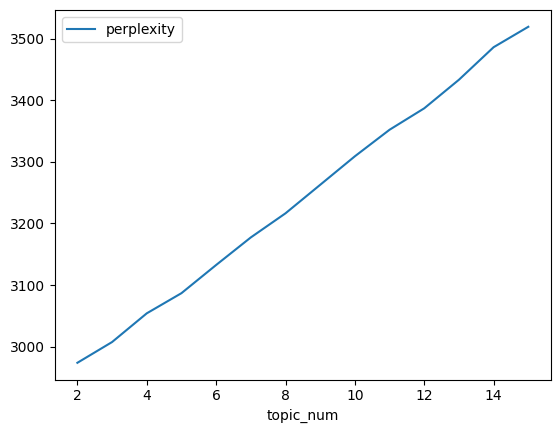

In [ ]:
result.plot.line(x='topic_num', y='perplexity')

PMI 的值都是負的，表示主題中的詞一致性較低，彼此之間的相關性不高。

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='topic_num'>

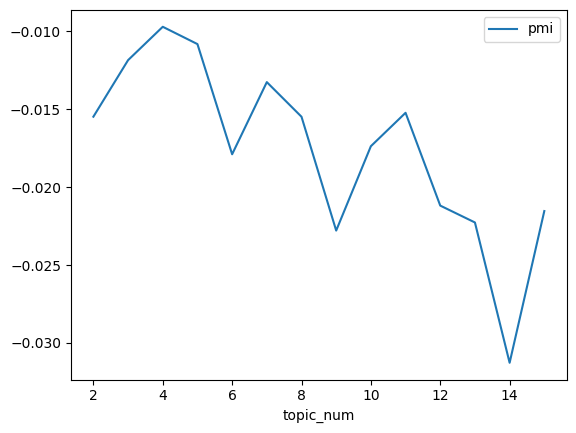

In [ ]:
result.plot.line(x='topic_num', y='pmi')

In [ ]:
ldamodel = LdaModel(
    corpus=corpus,
    id2word=dictionary, # 字典
    num_topics=4, # 生成幾個主題數
    random_state=2024, # 亂數
    passes = 100
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA模型結果的主題關鍵詞效果依然不佳，還是口語常用字居多

In [ ]:
# 顯示每個主題的關鍵詞
for idx, topic in ldamodel.print_topics(-1):
    print(f"Topic: {idx}\nWords: {topic}\n")

Topic: 0
Words: 0.006*"love" + 0.005*"could" + 0.005*"something" + 0.005*"wait" + 0.004*"take" + 0.004*"make" + 0.004*"maybe" + 0.004*"us" + 0.004*"still" + 0.004*"umm"

Topic: 1
Words: 0.004*"could" + 0.004*"something" + 0.004*"umm" + 0.004*"take" + 0.004*"ah" + 0.003*"starts" + 0.003*"maybe" + 0.003*"much" + 0.003*"make" + 0.003*"wow"

Topic: 2
Words: 0.005*"could" + 0.005*"something" + 0.004*"love" + 0.004*"maybe" + 0.004*"take" + 0.004*"make" + 0.004*"wait" + 0.004*"sure" + 0.004*"umm" + 0.004*"way"

Topic: 3
Words: 0.005*"could" + 0.005*"phone" + 0.004*"something" + 0.004*"way" + 0.004*"love" + 0.004*"never" + 0.003*"take" + 0.003*"man" + 0.003*"umm" + 0.003*"maybe"



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
p

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.016270 -0.007793       1        1  42.005655
0     -0.028865 -0.031851       2        1  22.437010
3      0.054505 -0.010563       3        1  17.793157
1     -0.009370  0.050207       4        1  17.764178, topic_info=         Term        Freq       Total Category  logprob  loglift
4683      cat  127.000000  127.000000  Default  30.0000  30.0000
370     phone  552.000000  552.000000  Default  29.0000  29.0000
3252      ohh  376.000000  376.000000  Default  28.0000  28.0000
7015    emily  160.000000  160.000000  Default  27.0000  27.0000
1135  listens  212.000000  212.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
175     first   97.572330  553.153830   Topic4  -5.9155  -0.0071
335      need   94.702929  576.851926   Topic4  -5.9454  -0.0789
520     thank   96.266338  625.872406   Topic4  -5.9290  -0.1440
298      love  102.111148  872.404884   Topic4  -5.8701  -0.4172
248       huh   91.507904  540.503402   Topic4  -5.9797  -0.0481

[377 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
4          1  0.421435  actually
4          2  0.247114  actually
4          3  0.174321  actually
4          4  0.157080  actually
7          1  0.435681        ah
...      ...       ...       ...
592        3  0.128160       wow
592        4  0.195444       wow
9664       2  0.064958     yemen
9664       4  0.909417     yemen
14453      1  0.971784      zack

[646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [ ]:
import pandas as pd
from bertopic import BERTopic

# 建立BERTopic模型
model = BERTopic()
topics, probabilities = model.fit_transform(grouped_data['concated'])

# 顯示每個主題的關鍵詞
for idx, topic in enumerate(model.get_topic_freq().head(5).Topic):
    print(f"Topic {topic}:\n{model.get_topic(topic)}\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/skimage/util/dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Topic 0:
[('could', 0.023566945179151044), ('something', 0.020618783500994022), ('wait', 0.018267914600678063), ('take', 0.01816846088327696), ('love', 0.01810413411997765), ('way', 0.017722421146100065), ('maybe', 0.01771677696333345), ('make', 0.017644494087564487), ('us', 0.016671083665980243), ('umm', 0.016602869212985545)]

Topic -1:
[('love', 0.023842676263823123), ('could', 0.020643920503260266), ('something', 0.020541786370758555), ('baby', 0.01836660076807651), ('take', 0.018130121867802326), ('umm', 0.018006640402158887), ('make', 0.016936938992129648), ('maybe', 0.016885496826854796), ('still', 0.01685763837930284), ('never', 0.01683740122609018)]

Topic 1:
[('baby', 0.04834044281968186), ('umm', 0.025032332553566856), ('room', 0.023310835509835613), ('sure', 0.022698333683879347), ('name', 0.021973077586701705), ('something', 0.02111234574173732), ('love', 0.021063329685701196), ('much', 0.020265512885619917), ('wait', 0.020200255301915385), ('maybe', 0.01996504195231226)]


 Bert-topic的表現則是2個主題，且分類表現也不好

In [ ]:
# 檢查模型是否正確生成主題
topics = model.get_topics()
if len(topics) == 0:
    print("模型未能生成主題，請檢查訓練資料是否正確。")
else:
    print(f"生成了 {len(topics)} 個主題。")

生成了 3 個主題。


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


主題0跟1的詞也是口語話與場景名詞居多，分數圖如下。

In [ ]:
fig = model.visualize_barchart(n_words=15)
fig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



在日常肥皂劇中，尤其是六人行中，每一集其實也沒有明確的主題，而是由多個小短劇組成。

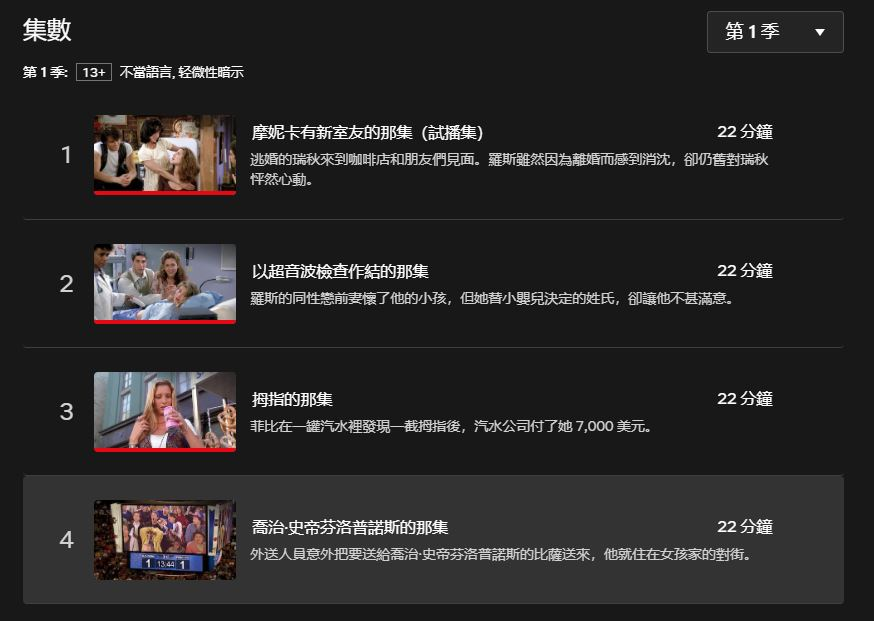

In [ ]:
from IPython.display import Image, display

# 設置圖片的路徑，根據你的雲端硬盤掛載點和具體存儲路徑進行調整
image_path = './img/img01.JPG'

# 顯示圖片
display(Image(filename=image_path))

例如在這第一集中以湯匙作為感情上有進展的代稱，就難以用模型歸納出主題。

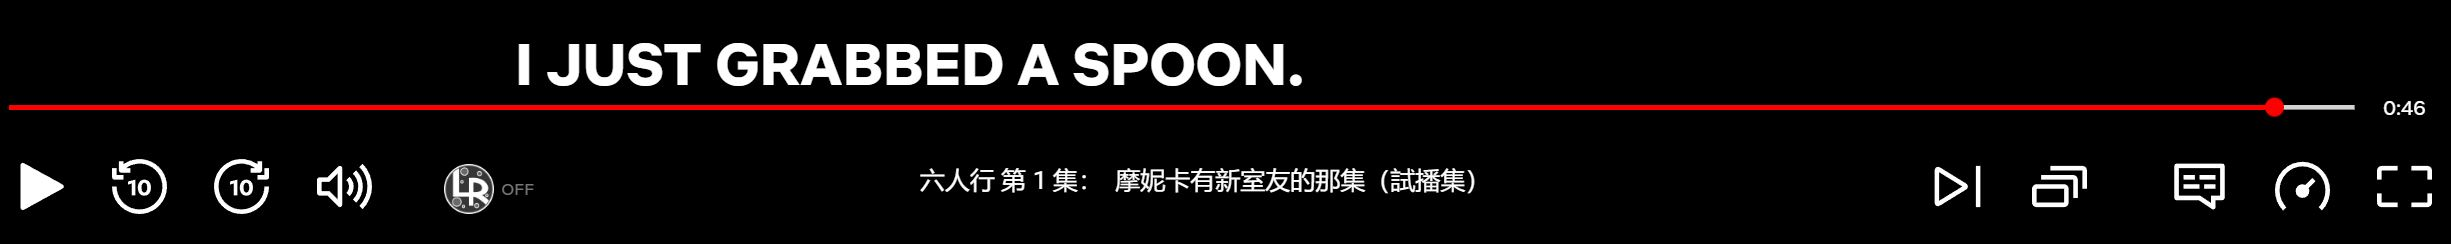

In [ ]:
# 設置圖片的路徑，根據你的雲端硬盤掛載點和具體存儲路徑進行調整
image_path2 = './img/img02.JPG'

# 顯示圖片
display(Image(filename=image_path2))

六人行的劇本並不適合做主題模型訓練，他的劇集的signal多半都包含在人物動作、語氣以及相處的習俗中，單純文本無法很好的作主題模型。

## **五、六人行角色關係分析**

**目標：**  
* **深入理解角色關係的複雜性**：《六人行》中的人物關係錯綜複雜，涉及友情、愛情、親情等多種情感。通過分析角色關係，可以更深入地理解這些情感的發展變化以及對人物性格和劇情走向的影響。
*   **發現潛在的敘事模式：**角色關係分析可以幫助我們發現劇集中潛在的敘事模式，例如哪些角色之間的關係更為密切、哪些角色之間的關係更具衝突性等等。這些模式可以幫助我們更好地理解劇集的敘事結構和主題。
*   **探索角色網絡的演變**：《六人行》歷經十年播出，人物關係也隨之發生了變化。通過分析不同時期的角色關係，可以探索這些變化背後的因素，例如角色成長、劇情發展等。

### 分析過程

#### 篩選出相對重要的角色
為了聚焦於主要角色之間的關係，需要對原始數據進行篩選。採用了以下兩個篩選標準：

* 說話次數：在每個場景中，只保留說話次數大於 5 的角色。

* 出場頻率：曾出現在 3 次場景以上的角色保留。

經過篩選，最終保留了 61 名角色。

In [ ]:
# 每個人在每個場景講了幾句話
ScenePeople = df_speaker.groupby(['season', 'episode', 'scene','speaker']).size().reset_index(name="count")
ScenePeople

season  episode                                      scene  \
0          1        1                               A Restaurant   
1          1        1                               A Restaurant   
2          1        1                               Central Perk   
3          1        1                               Central Perk   
4          1        1                               Central Perk   
...      ...      ...                                        ...   
7333      10       17  The street right in front of Central Perk   
7334      10       17                         The ticket-counter   
7335      10       17                         The ticket-counter   
7336      10       17                         The ticket-counter   
7337      10       17                         The ticket-counter   

           speaker  count  
0           Monica     12  
1             Paul     11  
2         Chandler     18  
3         Customer      1  
4             Joey     15  
...            ...    ...  
7333          Ross      5  
7334        Monica      8  
7335        Phoebe      6  
7336          Ross     13  
7337  Ticket agent      1  

[7338 rows x 5 columns]

In [ ]:
#每集每個場景，只保留說過5句話以上的人
ScenePeople=ScenePeople[ScenePeople['count']>5]

In [ ]:
#只保留出場3次以上的角色
speaker_counts = ScenePeople['speaker'].value_counts()
speakers_to_keep = speaker_counts[speaker_counts >= 3].index.tolist()
ScenePeople_filtered = ScenePeople[ScenePeople['speaker'].isin(speakers_to_keep)]
ScenePeople_filtered

season  episode               scene   speaker  count
0          1        1        A Restaurant    Monica     12
1          1        1        A Restaurant      Paul     11
2          1        1        Central Perk  Chandler     18
4          1        1        Central Perk      Joey     15
5          1        1        Central Perk    Monica     24
...      ...      ...                 ...       ...    ...
7328      10       17        The hospital     Erica      7
7329      10       17        The hospital    Monica     19
7334      10       17  The ticket-counter    Monica      8
7335      10       17  The ticket-counter    Phoebe      6
7336      10       17  The ticket-counter      Ross     13

[3714 rows x 5 columns]

In [ ]:
df_speaker_filtered=df_speaker[df_speaker['speaker'].isin(speakers_to_keep)]
df_speaker_filtered

season  episode                            scene   speaker  \
0           1        1                     Central Perk    Monica   
1           1        1                     Central Perk      Joey   
2           1        1                     Central Perk  Chandler   
3           1        1                     Central Perk    Phoebe   
4           1        1                     Central Perk    Phoebe   
...       ...      ...                              ...       ...   
60705      10       17  Monica and Chandler's apartment  Chandler   
60706      10       17  Monica and Chandler's apartment    Rachel   
60707      10       17  Monica and Chandler's apartment    Monica   
60708      10       17  Monica and Chandler's apartment    Rachel   
60709      10       17  Monica and Chandler's apartment  Chandler   

                                            conversation  
0      There's nothing to tell! He's just some guy I ...  
1      C'mon, you're going out with the guy! There's ...  
2      All right Joey, be nice.  So does he have a hu...  
3                               Wait, does he eat chalk?  
4      Just, 'cause, I don't want her to go through w...  
...                                                  ...  
60705                            Oh, it's gonna be okay.  
60706  Do you guys have to go to the new house right ...  
60707                                  We got some time.  
60708                   Okay, should we get some coffee?  
60709                                       Sure. Where?  

[58325 rows x 5 columns]

In [ ]:
df_speaker_filtered.to_csv('Friends_speaker_cleaned_CrucialOnly.csv', index=False)

#### 統計角色組合

對於每個場景，統計曾出現過的角色有哪些，並依此用於後續分析角色關係。

In [ ]:
ScenePeople_filtered=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/social_media/final_project/data/Friends_speaker_cleaned_CrucialOnly.csv')

In [ ]:
# Group by season, episode, and scene, then get the unique speakers
ScenePeopleUnique = ScenePeople_filtered.groupby(['season', 'episode', 'scene'])['speaker'].unique().reset_index()
ScenePeopleUnique

season  episode                                      scene  \
0          1        1                               A Restaurant   
1          1        1                               Central Perk   
2          1        1                                    Iridium   
3          1        1                        Monica and Rachel's   
4          1        1                         Monica's Apartment   
...      ...      ...                                        ...   
1660      10       17                                   The gate   
1661      10       17                    The gate at the airport   
1662      10       17                               The hospital   
1663      10       17  The street right in front of Central Perk   
1664      10       17                         The ticket-counter   

                                                speaker  
0                                        [Monica, Paul]  
1        [Monica, Joey, Chandler, Phoebe, Rachel, Ross]  
2                                              [Monica]  
3        [Rachel, Monica, Phoebe, Ross, Chandler, Joey]  
4     [Monica, Chandler, Ross, Rachel, Phoebe, Joey,...  
...                                                 ...  
1660                                           [Rachel]  
1661                             [Ross, Phoebe, Rachel]  
1662                          [Chandler, Monica, Erica]  
1663                                     [Ross, Phoebe]  
1664                             [Ross, Phoebe, Monica]  

[1665 rows x 4 columns]

移除只有出現一位重要角色的場景

In [ ]:
#過濾掉該場景只有1個人
ScenePeopleUnique = ScenePeopleUnique[ScenePeopleUnique['speaker'].str.len()>1]

#### 統計角色組合出現次數

對於每個場景，統計有哪些角色組合（兩兩一組），並計算各組合在不同場景的出現次數。

In [ ]:
# 把人物取組合兩兩一組
from itertools import combinations

def getComb(names):
  return list(combinations(names,2))
ScenePeopleUnique['name_comb'] = ScenePeopleUnique['speaker'].map(getComb)
ScenePeopleUnique

<ipython-input-11-72b640fc2051>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ScenePeopleUnique['name_comb'] = ScenePeopleUnique['speaker'].map(getComb)


season  episode                                      scene  \
0          1        1                               A Restaurant   
1          1        1                               Central Perk   
3          1        1                        Monica and Rachel's   
4          1        1                         Monica's Apartment   
5          1        1                           Ross's Apartment   
...      ...      ...                                        ...   
1659      10       17          The delivery room at the hospital   
1661      10       17                    The gate at the airport   
1662      10       17                               The hospital   
1663      10       17  The street right in front of Central Perk   
1664      10       17                         The ticket-counter   

                                                speaker  \
0                                        [Monica, Paul]   
1        [Monica, Joey, Chandler, Phoebe, Rachel, Ross]   
3        [Rachel, Monica, Phoebe, Ross, Chandler, Joey]   
4     [Monica, Chandler, Ross, Rachel, Phoebe, Joey,...   
5                                [Ross, Joey, Chandler]   
...                                                 ...   
1659                          [Monica, Chandler, Erica]   
1661                             [Ross, Phoebe, Rachel]   
1662                          [Chandler, Monica, Erica]   
1663                                     [Ross, Phoebe]   
1664                             [Ross, Phoebe, Monica]   

                                              name_comb  
0                                      [(Monica, Paul)]  
1     [(Monica, Joey), (Monica, Chandler), (Monica, ...  
3     [(Rachel, Monica), (Rachel, Phoebe), (Rachel, ...  
4     [(Monica, Chandler), (Monica, Ross), (Monica, ...  
5     [(Ross, Joey), (Ross, Chandler), (Joey, Chandl...  
...                                                 ...  
1659  [(Monica, Chandler), (Monica, Erica), (Chandle...  
1661  [(Ross, Phoebe), (Ross, Rachel), (Phoebe, Rach...  
1662  [(Chandler, Monica), (Chandler, Erica), (Monic...  
1663                                   [(Ross, Phoebe)]  
1664  [(Ross, Phoebe), (Ross, Monica), (Phoebe, Moni...  

[1489 rows x 5 columns]

#### 繪製人物關係圖

根據先前結果，繪製整個劇集的人物關係圖，再依序繪製 1-3 季、4-6 季、7-10 季各自的人物關係圖，以觀察角色關係的變化

In [ ]:
! pip install pyvis
! pip install networkx
! pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00


In [ ]:
import pyvis
import networkx as nx
import IPython
import random

In [ ]:
import sys
# Add the directory containing net_func.py to the Python path
sys.path.append('/content/drive/MyDrive/Colab_Notebooks/social_media/final_project')
# Import the module
import net_func

#### all season：在整部六人行劇集中，重要角色們之間的關係圖

In [ ]:
character_comb = ScenePeopleUnique['name_comb'].explode('name_comb').reset_index()
character_comb

index           name_comb
0          0      (Monica, Paul)
1          1      (Monica, Joey)
2          2  (Monica, Chandler)
3          3    (Monica, Phoebe)
4          4    (Monica, Rachel)
...      ...                 ...
11416  11416     (Monica, Erica)
11417  11417      (Ross, Phoebe)
11418  11418      (Ross, Phoebe)
11419  11419      (Ross, Monica)
11420  11420    (Phoebe, Monica)

[11421 rows x 2 columns]

In [ ]:
character_comb_count = pd.DataFrame(character_comb.name_comb.tolist(),columns=['name1', 'name2'])
# 加上value 給他們，之後可以計算出現次數
character_comb_count['value'] = 1
character_comb_count

name1     name2  value
0      Monica      Paul      1
1      Monica      Joey      1
2      Monica  Chandler      1
3      Monica    Phoebe      1
4      Monica    Rachel      1
...       ...       ...    ...
11416  Monica     Erica      1
11417    Ross    Phoebe      1
11418    Ross    Phoebe      1
11419    Ross    Monica      1
11420  Phoebe    Monica      1

[11421 rows x 3 columns]

In [ ]:
pers = np.unique(character_comb_count[['name1', 'name2']])
mat = pd.pivot_table(character_comb_count,index = 'name1', columns = 'name2' ,values='value' ,aggfunc='count').fillna(0).reindex(columns=pers, index=pers, fill_value=0).to_numpy()
tri = (np.tril(mat,-1).T + np.triu(mat,1))/2
mat_s = tri+tri.T
mat_s

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ]])

In [ ]:
net_func.getMeasure(mat=mat_s)

{'transitivity': 0.3619854721549637,
 'density': 0.23989071038251367,
 'distance': 1.7617486338797814,
 'diameter': 3,
 'clustering': 0.8377834887606517}

In [ ]:
eig_cent = net_func.centralityGraph(alg='eig',max_iter=10000,mat=mat_s)
eig_cent

matrix is Symmetric


[0.08759050883782869,
 0.08061606567143526,
 0.09953020863054467,
 0.017586130602082767,
 0.10480139798433835,
 0.2879653505454576,
 0.10850840488607011,
 0.08369329434430386,
 0.10489904244320057,
 0.05570409632102737,
 0.07985911336737439,
 0.025487961029294504,
 0.0917681141223887,
 0.08774784597952047,
 0.08369329434430386,
 0.08288913639496667,
 0.12575888771143054,
 0.09312957402768818,
 0.08577107347532036,
 0.08594128760726909,
 0.08759050883782869,
 0.08369329434430386,
 0.07897010832678769,
 0.17767113172030086,
 0.07578815266879876,
 0.12073494626895302,
 0.09149558814126148,
 0.09566212427131962,
 0.07578815266879876,
 0.28568398218662,
 0.08928873004603814,
 0.1087283657713783,
 0.08065050453485806,
 0.09189980332159223,
 0.06307724036595366,
 0.09588148495868828,
 0.09600816950179705,
 0.1049026525125215,
 0.11895287174564392,
 0.2848891431726857,
 0.13229740252562225,
 0.08138358837053304,
 0.07151500072169205,
 0.1361112137101673,
 0.0956284184146005,
 0.08738132747661,

In [ ]:
net = net_func.matPresentGraph(mat=mat_s,node_id=pers,node_value=(np.array(eig_cent)*100).tolist(),directed=False)

matrix is Symmetric


In [ ]:
# Set specific positions for important nodes (6 main characters)
important_nodes = ['Ross', 'Rachel', 'Chandler', 'Monica', 'Phoebe', 'Joey']
radius = 500  # Radius of the circle
angle = np.linspace(0, 2 * np.pi, len(important_nodes), endpoint=False)
positions = {node: (radius * np.cos(a), radius * np.sin(a)) for node, a in zip(important_nodes, angle)}

# Update node positions in the pyvis network
for node in net.nodes:
    if node['id'] in positions:
        node['x'] = positions[node['id']][0]
        node['y'] = positions[node['id']][1]
        node['fixed'] = True  # Fix the node in the specified position

In [ ]:
# Update edge widths proportionally
min_width = 0.5
max_width = 50
weights = [edge['title'] for edge in net.edges]
min_weight = min(weights)
max_weight = max(weights)

for edge in net.edges:
    weight = edge['title']
    edge['width'] = min_width + (max_width - min_width) * ((np.sqrt(weight) - np.sqrt(min_weight)) / (np.sqrt(max_weight) - np.sqrt(min_weight)))

In [ ]:
# Adjust repulsion settings
net.repulsion(
    node_distance=500,
    spring_length=400,
    spring_strength=0.05,
    damping=0.09
)

In [ ]:
# Set node label font size and color, node color, and edge color
for node in net.nodes:
    node['label'] = node['id']
    node['font'] = {'size': 50, 'color': 'brown','bold': True}
    node['color'] = '#FFFFAA'

for edge in net.edges:
    weight = edge['title']
    if weight <= 5:
        edge['color'] = '#ADD8E6'  # Light blue for weight <= 5
    elif 5 < weight <= 10:
        edge['color'] = '#87CEFA'  # Medium blue for 5 < weight <= 10
    elif 10 < weight <= 20:
        edge['color'] = '#00BFFF'  # Dark blue for 10 < weight <= 20
    else:
        edge['color'] = '#0000CD'  # Royal blue for weight > 20
for edge in net.edges:
    if edge['from'] in important_nodes and edge['to'] in important_nodes:
        edge['color'] = '#003C9D'

#### **Result：整部劇集中，重要角色們之間的關係圖**
(顏色較深代表角色間彼此關係較強烈)

---



整體關係圖呈現出一個緊密的社交網絡，其中主要角色之間的關係都比較密切。

六位主要角色（Rachel、Ross、Monica、Chandler、Phoebe、Joey）之間的關係尤為密切，他們不僅是好朋友，也是家人。

其他角色也與主要角色有不同程度的聯繫，形成了更加複雜的關係網絡。

In [ ]:
net.show("./person_net.html")
IPython.display.HTML('person_net.html')

./person_net.html


簡單介紹一下幾個特別緊密的人物關係，

* Rachel 和 Ross，2人是青梅竹馬，他們之間的關係經歷了分分合合，可以透過針對各季關係的分析看出2人當時的感情狀況。
* Monica 和 Chandler 2人 從朋友發展為戀人，並在最終結婚
* Joey 和 Chandler 是劇中的室友兼最佳損友。他們之間的關係幽默而溫暖，充滿了兄弟情誼。


而透過各季關係的分析，可以大致看出一些主要劇情的發展

#### season 1-3：在1-3季中，重要角色們之間的關係圖

In [ ]:
ScenePeopleUnique1_3=ScenePeopleUnique[ScenePeopleUnique['season']<=3]
ScenePeopleUnique1_3

season  episode                               scene  \
0         1        1                        A Restaurant   
1         1        1                        Central Perk   
3         1        1                 Monica and Rachel's   
4         1        1                  Monica's Apartment   
5         1        1                    Ross's Apartment   
..      ...      ...                                 ...   
466       3       24                 Monica and Rachel's   
467       3       24         Monica and Rachel's balcony   
468       3       24                           The Arena   
469       3       24  The Ultimate Fighting Championship   
470       3       24     The street outside Central Perk   

                                               speaker  \
0                                       [Monica, Paul]   
1       [Monica, Joey, Chandler, Phoebe, Rachel, Ross]   
3       [Rachel, Monica, Phoebe, Ross, Chandler, Joey]   
4    [Monica, Chandler, Ross, Rachel, Phoebe, Joey,...   
5                               [Ross, Joey, Chandler]   
..                                                 ...   
466     [Ross, Rachel, Chandler, Phoebe, Monica, Joey]   
467             [Monica, Ross, Phoebe, Chandler, Joey]   
468                                     [Monica, Pete]   
469                               [Ross, Monica, Pete]   
470                                   [Phoebe, Rachel]   

                                             name_comb  
0                                     [(Monica, Paul)]  
1    [(Monica, Joey), (Monica, Chandler), (Monica, ...  
3    [(Rachel, Monica), (Rachel, Phoebe), (Rachel, ...  
4    [(Monica, Chandler), (Monica, Ross), (Monica, ...  
5    [(Ross, Joey), (Ross, Chandler), (Joey, Chandl...  
..                                                 ...  
466  [(Ross, Rachel), (Ross, Chandler), (Ross, Phoe...  
467  [(Monica, Ross), (Monica, Phoebe), (Monica, Ch...  
468                                   [(Monica, Pete)]  
469     [(Ross, Monica), (Ross, Pete), (Monica, Pete)]  
470                                 [(Phoebe, Rachel)]  

[410 rows x 5 columns]

In [ ]:
character_comb = ScenePeopleUnique1_3['name_comb'].explode('name_comb').reset_index()
character_comb

index           name_comb
0         0      (Monica, Paul)
1         1      (Monica, Joey)
2         2  (Monica, Chandler)
3         3    (Monica, Phoebe)
4         4    (Monica, Rachel)
...     ...                 ...
3744   3744      (Monica, Pete)
3745   3745      (Ross, Monica)
3746   3746        (Ross, Pete)
3747   3747      (Monica, Pete)
3748   3748    (Phoebe, Rachel)

[3749 rows x 2 columns]

In [ ]:
character_comb_count = pd.DataFrame(character_comb.name_comb.tolist(),columns=['name1', 'name2'])
# 加上value 給他們，之後可以計算出現次數
character_comb_count['value'] = 1
character_comb_count

name1     name2  value
0     Monica      Paul      1
1     Monica      Joey      1
2     Monica  Chandler      1
3     Monica    Phoebe      1
4     Monica    Rachel      1
...      ...       ...    ...
3744  Monica      Pete      1
3745    Ross    Monica      1
3746    Ross      Pete      1
3747  Monica      Pete      1
3748  Phoebe    Rachel      1

[3749 rows x 3 columns]

In [ ]:
pers = np.unique(character_comb_count[['name1', 'name2']])
mat = pd.pivot_table(character_comb_count,index = 'name1', columns = 'name2' ,values='value' ,aggfunc='count').fillna(0).reindex(columns=pers, index=pers, fill_value=0).to_numpy()
tri = (np.tril(mat,-1).T + np.triu(mat,1))/2
mat_s = tri+tri.T
mat_s

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0.5],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0. , 0. ]])

In [ ]:
net_func.getMeasure(mat=mat_s)

{'transitivity': 0.44313355356300144,
 'density': 0.2833333333333333,
 'distance': 1.726923076923077,
 'diameter': 3,
 'clustering': 0.766176362104354}

In [ ]:
eig_cent = net_func.centralityGraph(alg='eig',max_iter=10000,mat=mat_s)
eig_cent

matrix is Symmetric


[0.1263764911127648,
 0.12550329970601407,
 0.14295167833403458,
 0.3089245319458047,
 0.11691044982576695,
 0.018368332178873945,
 0.01855633353422796,
 0.11691044982576695,
 0.11878529799698997,
 0.0903953051736523,
 0.09907173947559801,
 0.12300785535375848,
 0.1263764911127648,
 0.1740637932281369,
 0.018179704274156657,
 0.14285129786263057,
 0.01855633353422796,
 0.03649068705881919,
 0.30579466498339786,
 0.1157185032896873,
 0.1168586361923717,
 0.13727993082734768,
 0.10832965869824353,
 0.3026543667586584,
 0.12490027574851838,
 0.10832965869824353,
 0.13476345740344367,
 0.10832965869824353,
 0.14107036926045574,
 0.2827669385832095,
 0.2985697432667484,
 0.14110079504764717,
 0.30475383199637407,
 0.05523047829137774,
 0.1160568620837159,
 0.1429516783340346,
 0.1168586361923717,
 0.10832965869824353,
 0.12864087492977316,
 0.16682480139574973]

In [ ]:
net = net_func.matPresentGraph(mat=mat_s,node_id=pers,node_value=(np.array(eig_cent)*100).tolist(),directed=False)

matrix is Symmetric


In [ ]:
# Set specific positions for important nodes (6 main characters)
important_nodes = ['Ross', 'Rachel', 'Chandler', 'Monica', 'Phoebe', 'Joey']
radius = 400  # Radius of the circle
angle = np.linspace(0, 2 * np.pi, len(important_nodes), endpoint=False)
positions = {node: (radius * np.cos(a), radius * np.sin(a)) for node, a in zip(important_nodes, angle)}

# Update node positions in the pyvis network
for node in net.nodes:
    if node['id'] in positions:
        node['x'] = positions[node['id']][0]
        node['y'] = positions[node['id']][1]
        node['fixed'] = True  # Fix the node in the specified position

In [ ]:
# Update edge widths proportionally
min_width = 0.5
max_width = 50
weights = [edge['title'] for edge in net.edges]
min_weight = min(weights)
max_weight = max(weights)

for edge in net.edges:
    weight = edge['title']
    edge['width'] = min_width + (max_width - min_width) * ((np.sqrt(weight) - np.sqrt(min_weight)) / (np.sqrt(max_weight) - np.sqrt(min_weight)))

In [ ]:
# Adjust repulsion settings
net.repulsion(
    node_distance=300,
    spring_length=200,
    spring_strength=0.01,
    damping=0.09
)

In [ ]:
# Set node label font size and color, node color, and edge color
for node in net.nodes:
    node['label'] = node['id']
    node['font'] = {'size': 50, 'color': 'brown','bold': True}
    node['color'] = '#FFFFAA'

for edge in net.edges:
    weight = edge['title']
    if weight <= 5:
        edge['color'] = '#ADD8E6'  # Light blue for weight <= 5
    elif 5 < weight <= 10:
        edge['color'] = '#87CEFA'  # Medium blue for 5 < weight <= 10
    elif 10 < weight <= 20:
        edge['color'] = '#00BFFF'  # Dark blue for 10 < weight <= 20
    else:
        edge['color'] = '#0000CD'  # Royal blue for weight > 20
for edge in net.edges:
    if edge['from'] in important_nodes and edge['to'] in important_nodes:
        edge['color'] = '#003C9D'

#### **Result：1-3季中，重要角色們之間的關係圖**

(顏色較深代表角色間彼此關係較強烈)


---
人物關係圖中，除了6位主角外，其他角色的連線大多顏色較淺，呈現出一個正在逐漸緊密的社交網絡。

主要角色之間的關係在不斷發展，彼此之間的聯繫越來越密切。

* Monica 和 Richard  以及 Chandler 和 Janice 的組合，2對情侶皆在第1-3季中關係密切，但最終分手，在後續季的分析中，可以看出連線顏色變化由深到淺



In [ ]:
net.show("./person_net_1.html")
IPython.display.HTML('person_net_1.html')

./person_net_1.html


Rachel 和 Ross 在第1-3季中經歷了分分合合，但最終還是走到了一起。

Monica 和 Chandler 在第1-3季中逐漸加深了關係，最終發展為戀人關係。

#### season 4-6：在4-6季中，重要角色們之間的關係圖

In [ ]:
ScenePeopleUnique4_6=ScenePeopleUnique[(ScenePeopleUnique['season']>=4) & (ScenePeopleUnique['season']<=6)]
ScenePeopleUnique4_6

season  episode                               scene  \
471       4        1  A hallway in an apartment building   
472       4        1                        Central Perk   
473       4        1                 Monica and Rachel's   
475       4        1                    Rachel’s bedroom   
476       4        1                           The beach   
..      ...      ...                                 ...   
973       6       24                 Richard’s Apartment   
974       6       24                    Ross's apartment   
975       6       24                   The Charity Event   
976       6       24                         The Hallway   
977       6       24                      The Restaurant   

                                            speaker  \
471                                [Phoebe, Ursula]   
472                  [Ross, Chandler, Joey, Phoebe]   
473  [Monica, Joey, Chandler, Phoebe, Ross, Rachel]   
475                [Rachel, Ross, Chandler, Monica]   
476                        [Chandler, Monica, Joey]   
..                                              ...   
973                     [Monica, Richard, Chandler]   
974                                  [Ross, Rachel]   
975                          [Phoebe, Rachel, Joey]   
976        [Joey, Chandler, Monica, Rachel, Phoebe]   
977                     [Monica, Richard, Chandler]   

                                             name_comb  
471                                 [(Phoebe, Ursula)]  
472  [(Ross, Chandler), (Ross, Joey), (Ross, Phoebe...  
473  [(Monica, Joey), (Monica, Chandler), (Monica, ...  
475  [(Rachel, Ross), (Rachel, Chandler), (Rachel, ...  
476  [(Chandler, Monica), (Chandler, Joey), (Monica...  
..                                                 ...  
973  [(Monica, Richard), (Monica, Chandler), (Richa...  
974                                   [(Ross, Rachel)]  
975  [(Phoebe, Rachel), (Phoebe, Joey), (Rachel, Jo...  
976  [(Joey, Chandler), (Joey, Monica), (Joey, Rach...  
977  [(Monica, Richard), (Monica, Chandler), (Richa...  

[452 rows x 5 columns]

In [ ]:
character_comb = ScenePeopleUnique4_6['name_comb'].explode('name_comb').reset_index()
character_comb

index            name_comb
0         0     (Phoebe, Ursula)
1         1     (Ross, Chandler)
2         2         (Ross, Joey)
3         3       (Ross, Phoebe)
4         4     (Chandler, Joey)
...     ...                  ...
3588   3588     (Monica, Phoebe)
3589   3589     (Rachel, Phoebe)
3590   3590    (Monica, Richard)
3591   3591   (Monica, Chandler)
3592   3592  (Richard, Chandler)

[3593 rows x 2 columns]

In [ ]:
character_comb_count = pd.DataFrame(character_comb.name_comb.tolist(),columns=['name1', 'name2'])
# 加上value 給他們，之後可以計算出現次數
character_comb_count['value'] = 1
character_comb_count

name1     name2  value
0       Phoebe    Ursula      1
1         Ross  Chandler      1
2         Ross      Joey      1
3         Ross    Phoebe      1
4     Chandler      Joey      1
...        ...       ...    ...
3588    Monica    Phoebe      1
3589    Rachel    Phoebe      1
3590    Monica   Richard      1
3591    Monica  Chandler      1
3592   Richard  Chandler      1

[3593 rows x 3 columns]

In [ ]:
pers = np.unique(character_comb_count[['name1', 'name2']])
mat = pd.pivot_table(character_comb_count,index = 'name1', columns = 'name2' ,values='value' ,aggfunc='count').fillna(0).reindex(columns=pers, index=pers, fill_value=0).to_numpy()
tri = (np.tril(mat,-1).T + np.triu(mat,1))/2
mat_s = tri+tri.T
mat_s

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
net_func.getMeasure(mat=mat_s)

{'transitivity': 0.4216722729456992,
 'density': 0.25435540069686413,
 'distance': 1.7758420441347271,
 'diameter': 3,
 'clustering': 0.788762114270382}

In [ ]:
eig_cent = net_func.centralityGraph(alg='eig',max_iter=10000,mat=mat_s)
eig_cent

matrix is Symmetric


[0.11776331478727502,
 0.12157968257612911,
 0.1347127624181953,
 0.31094515370820464,
 0.12189050910598037,
 0.11776331478727502,
 0.03751895767870167,
 0.12347582086996729,
 0.18282724371734904,
 0.11776331478727502,
 0.12189050910598037,
 0.18529835392199479,
 0.05579939472301556,
 0.13306355752356822,
 0.11776331478727502,
 0.1305098255137022,
 0.11056645428956631,
 0.2996054952250729,
 0.13306355752356822,
 0.12816698807559268,
 0.1291298205635783,
 0.0922568986356181,
 0.019002536988438352,
 0.3029905817347828,
 0.1440004302156626,
 0.12173950270715414,
 0.017794423611848086,
 0.1440004302156626,
 0.12943647168942163,
 0.2991290654994449,
 0.2911761761554783,
 0.03751895767870167,
 0.30539036027662253,
 0.08180157257089614,
 0.11056645428956631,
 0.04549889803107137,
 0.04520531632088532,
 0.03731209264238655,
 0.11845794924899895,
 0.018280437044313893,
 0.09209212741943071,
 0.14103938836515575]

In [ ]:
net = net_func.matPresentGraph(mat=mat_s,node_id=pers,node_value=(np.array(eig_cent)*100).tolist(),directed=False)

matrix is Symmetric


In [ ]:
# Set specific positions for important nodes (6 main characters)
important_nodes = ['Ross', 'Rachel', 'Chandler', 'Monica', 'Phoebe', 'Joey']
radius = 400  # Radius of the circle
angle = np.linspace(0, 2 * np.pi, len(important_nodes), endpoint=False)
positions = {node: (radius * np.cos(a), radius * np.sin(a)) for node, a in zip(important_nodes, angle)}

# Update node positions in the pyvis network
for node in net.nodes:
    if node['id'] in positions:
        node['x'] = positions[node['id']][0]
        node['y'] = positions[node['id']][1]
        node['fixed'] = True  # Fix the node in the specified position

In [ ]:
# Update edge widths proportionally
min_width = 0.5
max_width = 50
weights = [edge['title'] for edge in net.edges]
min_weight = min(weights)
max_weight = max(weights)

for edge in net.edges:
    weight = edge['title']
    edge['width'] = min_width + (max_width - min_width) * ((np.sqrt(weight) - np.sqrt(min_weight)) / (np.sqrt(max_weight) - np.sqrt(min_weight)))

In [ ]:
# Adjust repulsion settings
net.repulsion(
    node_distance=300,
    spring_length=200,
    spring_strength=0.01,
    damping=0.09
)

In [ ]:
# Set node label font size and color, node color, and edge color
for node in net.nodes:
    node['label'] = node['id']
    node['font'] = {'size': 50, 'color': 'brown','bold': True}
    node['color'] = '#FFFFAA'

for edge in net.edges:
    weight = edge['title']
    if weight <= 5:
        edge['color'] = '#ADD8E6'  # Light blue for weight <= 5
    elif 5 < weight <= 10:
        edge['color'] = '#87CEFA'  # Medium blue for 5 < weight <= 10
    elif 10 < weight <= 20:
        edge['color'] = '#00BFFF'  # Dark blue for 10 < weight <= 20
    else:
        edge['color'] = '#0000CD'  # Royal blue for weight > 20
for edge in net.edges:
    if edge['from'] in important_nodes and edge['to'] in important_nodes:
        edge['color'] = '#003C9D'

#### **Result：4-6季中，重要角色們之間的關係圖**
(顏色較深代表角色間彼此關係較強烈)


---

人物關係圖呈現出一個更加穩定和成熟的社交網絡。

主要角色之間的關係已經非常牢固，彼此之間的聯繫更加緊密。



In [ ]:
net.show("./person_net_3.html")
IPython.display.HTML('person_net_3.html')

./person_net_3.html


#### season 7-10：在7-10季中，重要角色們之間的關係圖

In [ ]:
ScenePeopleUnique7_10=ScenePeopleUnique[(ScenePeopleUnique['season']>=7) & (ScenePeopleUnique['season']<=10)]
ScenePeopleUnique7_10

season  episode                                      scene  \
978        7        1                          Joey and Rachel's   
979        7        1                                     Monica   
980        7        1              Monica and Chandler’s bedroom   
981        7        1                           Rachel’s bedroom   
982        7        2                                A Classroom   
...      ...      ...                                        ...   
1659      10       17          The delivery room at the hospital   
1661      10       17                    The gate at the airport   
1662      10       17                               The hospital   
1663      10       17  The street right in front of Central Perk   
1664      10       17                         The ticket-counter   

                                             speaker  \
978                   [Chandler, Rachel, Ross, Joey]   
979   [Ross, Chandler, Joey, Monica, Phoebe, Rachel]   
980   [Monica, Chandler, Phoebe, Joey, Rachel, Ross]   
981                                   [Ross, Rachel]   
982                                   [Ross, Phoebe]   
...                                              ...   
1659                       [Monica, Chandler, Erica]   
1661                          [Ross, Phoebe, Rachel]   
1662                       [Chandler, Monica, Erica]   
1663                                  [Ross, Phoebe]   
1664                          [Ross, Phoebe, Monica]   

                                              name_comb  
978   [(Chandler, Rachel), (Chandler, Ross), (Chandl...  
979   [(Ross, Chandler), (Ross, Joey), (Ross, Monica...  
980   [(Monica, Chandler), (Monica, Phoebe), (Monica...  
981                                    [(Ross, Rachel)]  
982                                    [(Ross, Phoebe)]  
...                                                 ...  
1659  [(Monica, Chandler), (Monica, Erica), (Chandle...  
1661  [(Ross, Phoebe), (Ross, Rachel), (Phoebe, Rach...  
1662  [(Chandler, Monica), (Chandler, Erica), (Monic...  
1663                                   [(Ross, Phoebe)]  
1664  [(Ross, Phoebe), (Ross, Monica), (Phoebe, Moni...  

[627 rows x 5 columns]

In [ ]:
character_comb = ScenePeopleUnique7_10['name_comb'].explode('name_comb').reset_index()
character_comb

index           name_comb
0         0  (Chandler, Rachel)
1         1    (Chandler, Ross)
2         2    (Chandler, Joey)
3         3      (Rachel, Ross)
4         4      (Rachel, Joey)
...     ...                 ...
4074   4074     (Monica, Erica)
4075   4075      (Ross, Phoebe)
4076   4076      (Ross, Phoebe)
4077   4077      (Ross, Monica)
4078   4078    (Phoebe, Monica)

[4079 rows x 2 columns]

In [ ]:
character_comb_count = pd.DataFrame(character_comb.name_comb.tolist(),columns=['name1', 'name2'])
# 加上value 給他們，之後可以計算出現次數
character_comb_count['value'] = 1
character_comb_count

name1   name2  value
0     Chandler  Rachel      1
1     Chandler    Ross      1
2     Chandler    Joey      1
3       Rachel    Ross      1
4       Rachel    Joey      1
...        ...     ...    ...
4074    Monica   Erica      1
4075      Ross  Phoebe      1
4076      Ross  Phoebe      1
4077      Ross  Monica      1
4078    Phoebe  Monica      1

[4079 rows x 3 columns]

In [ ]:
pers = np.unique(character_comb_count[['name1', 'name2']])
mat = pd.pivot_table(character_comb_count,index = 'name1', columns = 'name2' ,values='value' ,aggfunc='count').fillna(0).reindex(columns=pers, index=pers, fill_value=0).to_numpy()
tri = (np.tril(mat,-1).T + np.triu(mat,1))/2
mat_s = tri+tri.T
mat_s

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ]])

In [ ]:
net_func.getMeasure(mat=mat_s)

{'transitivity': 0.43240916135698293,
 'density': 0.2590194264569843,
 'distance': 1.7567067530064755,
 'diameter': 3,
 'clustering': 0.8461435946235624}

In [ ]:
eig_cent = net_func.centralityGraph(alg='eig',max_iter=10000,mat=mat_s)
eig_cent

matrix is Symmetric


[0.10424837281784642,
 0.11909884266924,
 0.02442156867269582,
 0.03967922554526556,
 0.29236910604961047,
 0.14199189658918174,
 0.1316788157705447,
 0.07157270125475641,
 0.04794057699035014,
 0.031886227154800474,
 0.08022863270905634,
 0.11359457063967425,
 0.12097746466850472,
 0.1040056740263643,
 0.09639113165576865,
 0.10159619671370697,
 0.16856002365129621,
 0.09639113165576865,
 0.12781211079003774,
 0.08115862363966231,
 0.08115862363966231,
 0.2965839140831434,
 0.09804327929217342,
 0.038583323758135044,
 0.03308879694014962,
 0.12376156019503828,
 0.1376060092953538,
 0.15477341771722988,
 0.28385813057472675,
 0.14792497457508108,
 0.09639113165576865,
 0.09406332827296722,
 0.15760834113620065,
 0.12428651046860814,
 0.27114766724498607,
 0.2986194318030054,
 0.11701829289653881,
 0.2993397444505857,
 0.05898102727597508,
 0.1035503335680228,
 0.12748662833051663,
 0.023162004670424372,
 0.12198563282400489,
 0.08843118852207106,
 0.12097746466850472,
 0.12937739533755

In [ ]:
net = net_func.matPresentGraph(mat=mat_s,node_id=pers,node_value=(np.array(eig_cent)*100).tolist(),directed=False)

matrix is Symmetric


In [ ]:
# Set specific positions for important nodes (6 main characters)
important_nodes = ['Ross', 'Rachel', 'Chandler', 'Monica', 'Phoebe', 'Joey']
radius = 400  # Radius of the circle
angle = np.linspace(0, 2 * np.pi, len(important_nodes), endpoint=False)
positions = {node: (radius * np.cos(a), radius * np.sin(a)) for node, a in zip(important_nodes, angle)}

# Update node positions in the pyvis network
for node in net.nodes:
    if node['id'] in positions:
        node['x'] = positions[node['id']][0]
        node['y'] = positions[node['id']][1]
        node['fixed'] = True  # Fix the node in the specified position

In [ ]:
# Update edge widths proportionally
min_width = 0.5
max_width = 50
weights = [edge['title'] for edge in net.edges]
min_weight = min(weights)
max_weight = max(weights)

for edge in net.edges:
    weight = edge['title']
    edge['width'] = min_width + (max_width - min_width) * ((np.sqrt(weight) - np.sqrt(min_weight)) / (np.sqrt(max_weight) - np.sqrt(min_weight)))

In [ ]:
# Adjust repulsion settings
net.repulsion(
    node_distance=300,
    spring_length=200,
    spring_strength=0.01,
    damping=0.09
)

In [ ]:
# Set node label font size and color, node color, and edge color
for node in net.nodes:
    node['label'] = node['id']
    node['font'] = {'size': 50, 'color': 'brown','bold': True}
    node['color'] = '#FFFFAA'

for edge in net.edges:
    weight = edge['title']
    if weight <= 5:
        edge['color'] = '#ADD8E6'  # Light blue for weight <= 5
    elif 5 < weight <= 10:
        edge['color'] = '#87CEFA'  # Medium blue for 5 < weight <= 10
    elif 10 < weight <= 20:
        edge['color'] = '#00BFFF'  # Dark blue for 10 < weight <= 20
    else:
        edge['color'] = '#0000CD'  # Royal blue for weight > 20
for edge in net.edges:
    if edge['from'] in important_nodes and edge['to'] in important_nodes:
        edge['color'] = '#003C9D'

#### **Result：7-10季中，重要角色們之間的關係圖**
(顏色較深代表角色間彼此關係較強烈)


---



In [ ]:
net.show("./person_net_4.html")
IPython.display.HTML('person_net_4.html')

./person_net_4.html


### 各季結果比較

劇中主要角色之一的Ross，除了與Rachel經歷分分合合的戀情，他在劇中共有過12位女友，還經歷3次離婚，可以透過各季的關係圖來看出Ross感情的發展

在1到3季，就曾與 茱莉 Julie、邦妮Bonnie 交往，

In [ ]:

IPython.display.HTML('person_net_1-3.html')

而在4到6季中，則是先後與雪兒 Cheryl 以及艾蜜莉交往，


In [ ]:
IPython.display.HTML('person_net_4-6.html')

在劇情的後段，則是查理 Charlie 蒙娜Mona，
但可以看出不管是在哪一季中，他與Rachel的關係始終是緊密的。

In [ ]:
IPython.display.HTML('person_net_7-10.html')